In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import dump, load
%matplotlib inline

plt.style.use('seaborn')

In [11]:
month = 'nov'
print(month)

# read saved dataset.
df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
df_normalized.head()

# get groups and keys on dataset.

new_groups = df_normalized.groupby('meterid')
new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display('number of valid meterids:', len(new_id_list))

nov


'number of valid meterids:'

118

In [12]:
from sklearn.linear_model import LinearRegression

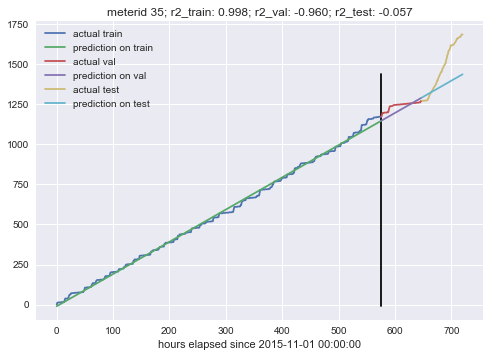

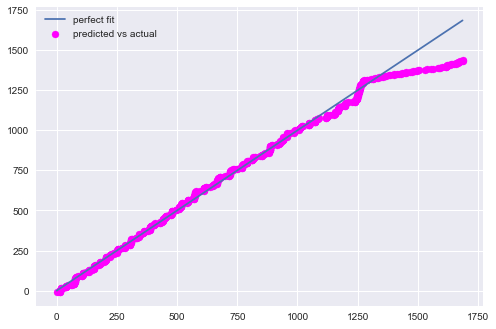

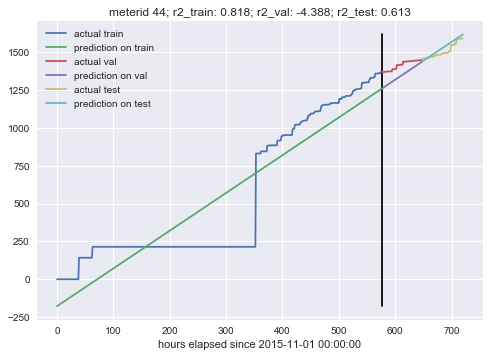

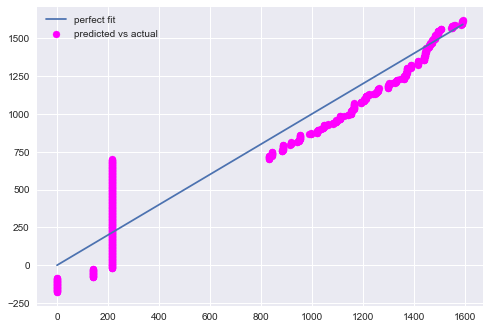

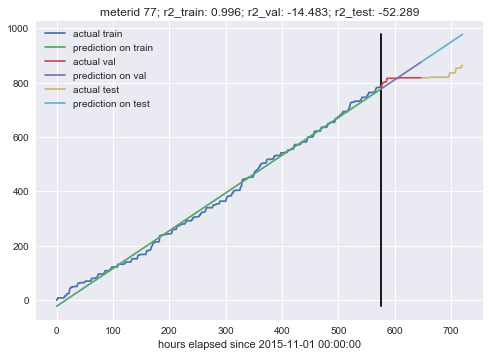

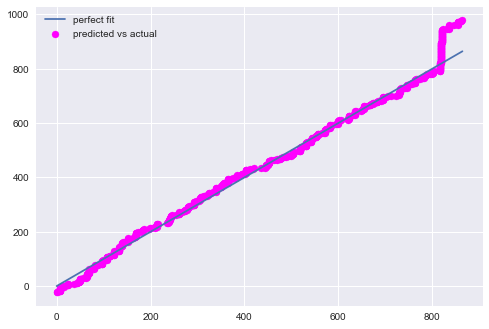

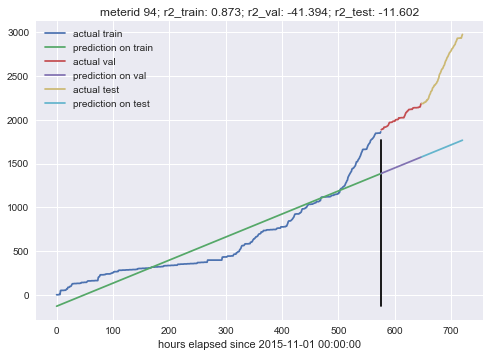

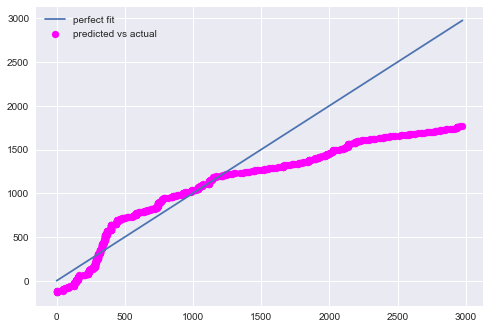

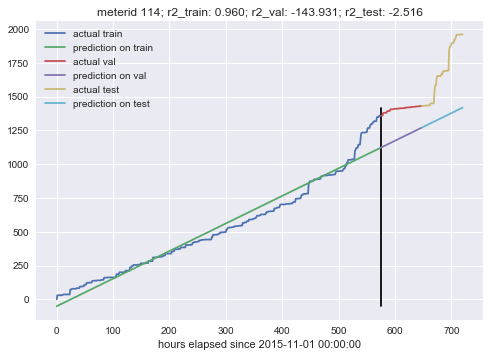

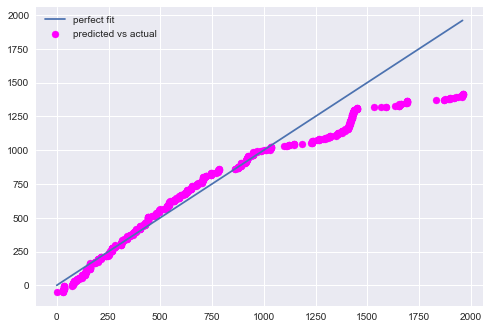

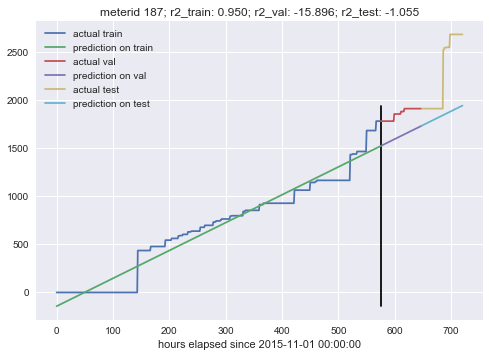

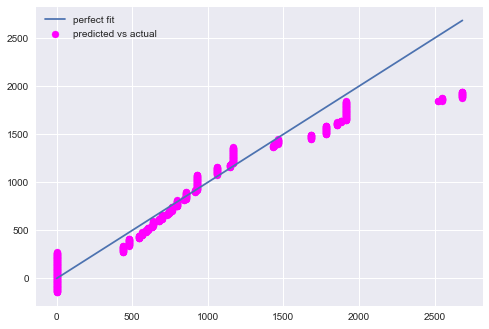

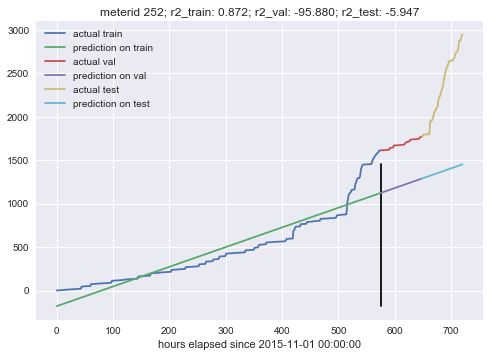

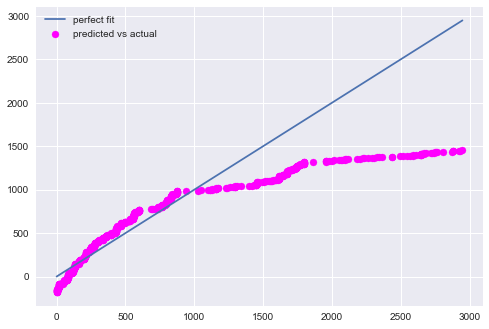

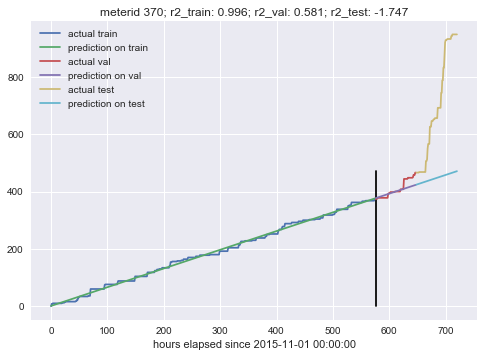

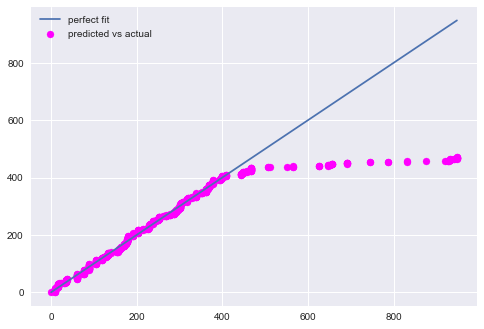

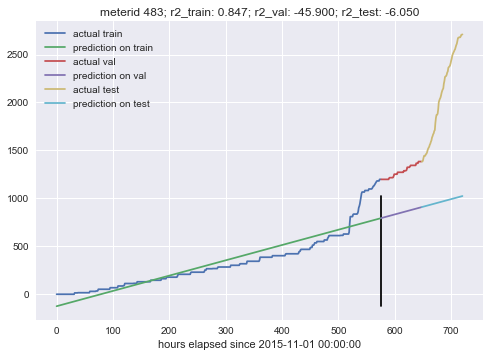

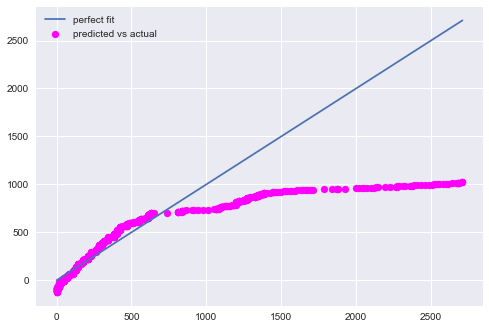

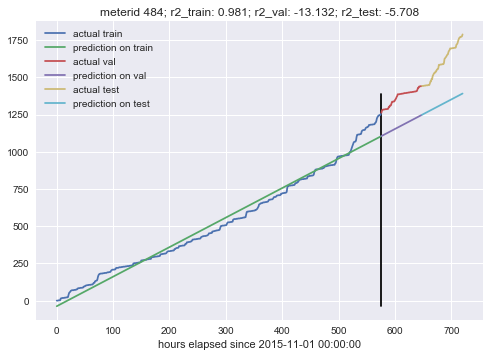

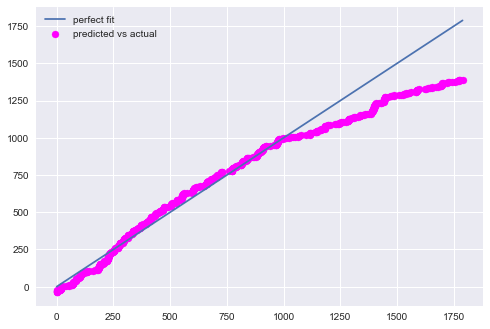

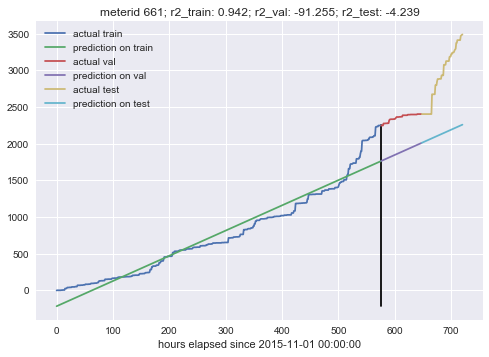

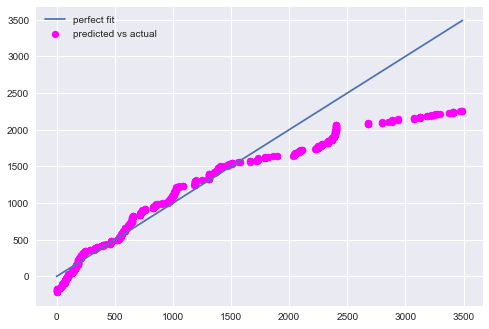

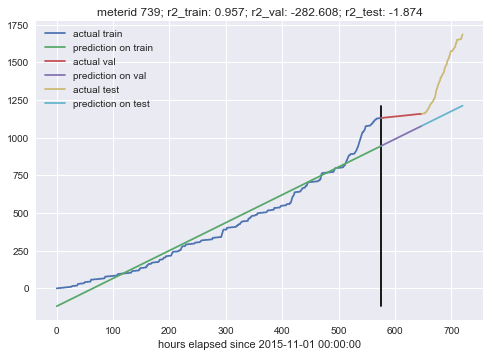

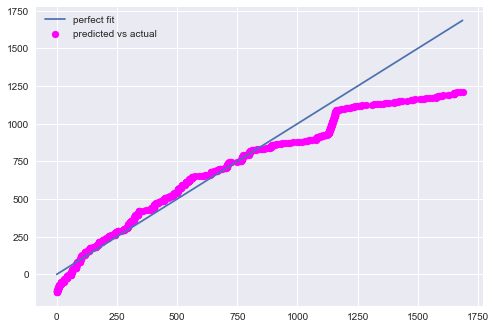

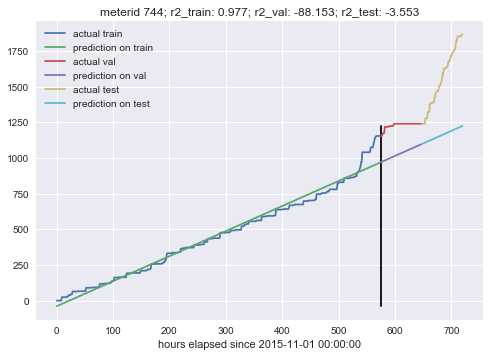

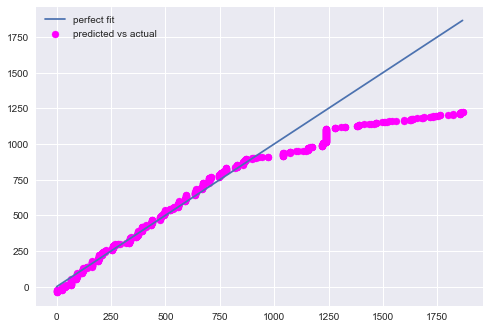

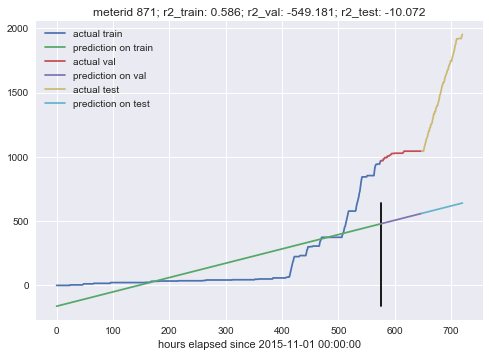

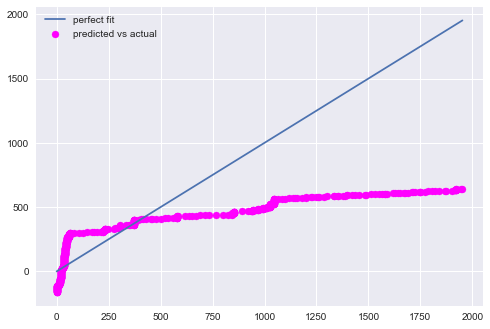

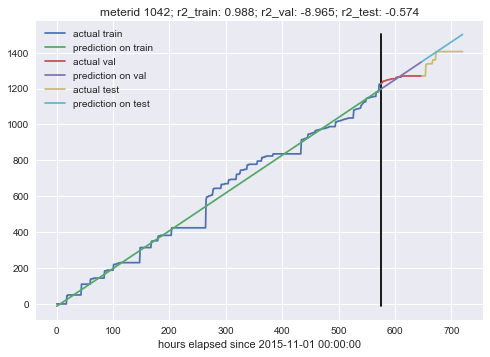

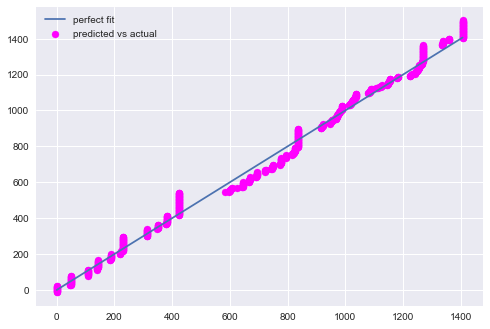

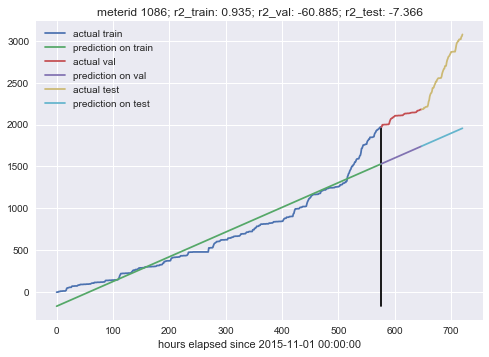

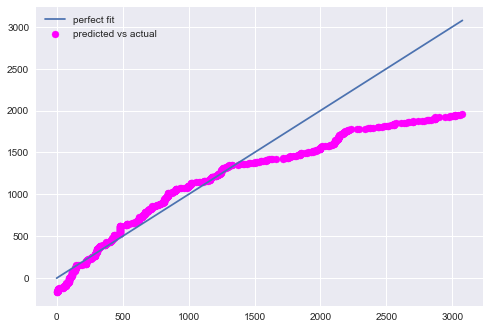

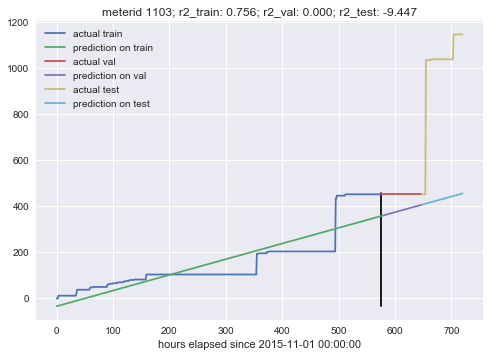

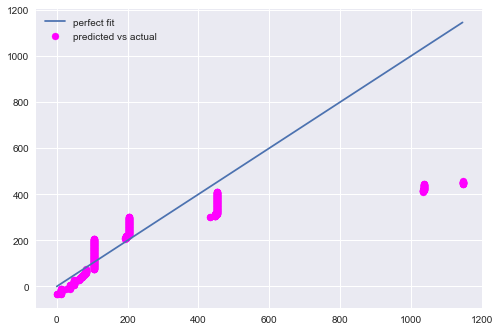

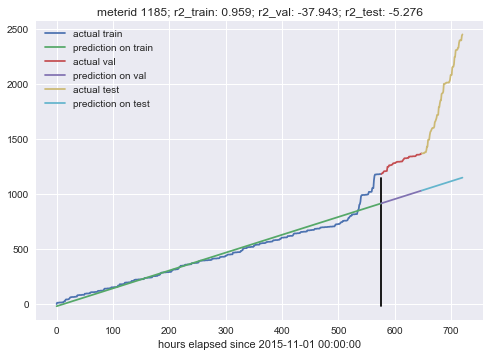

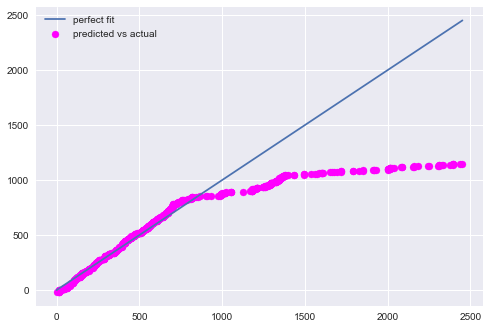

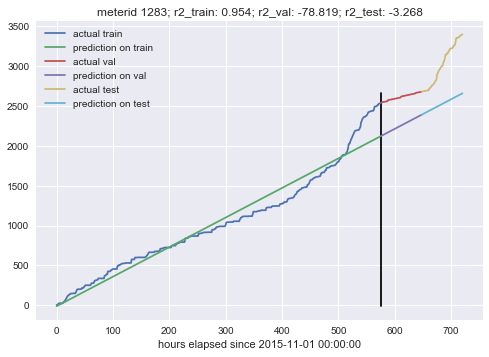

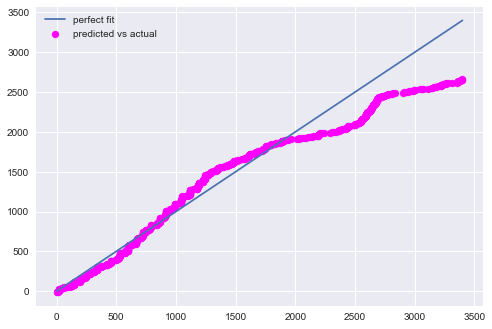

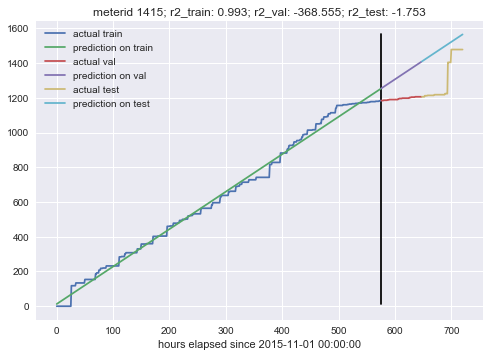

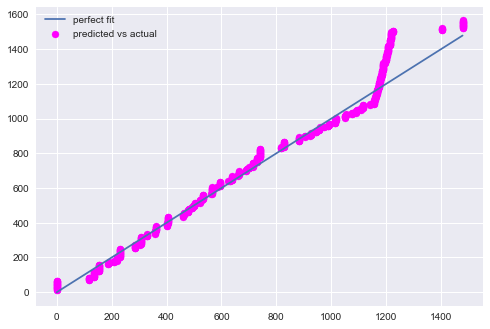

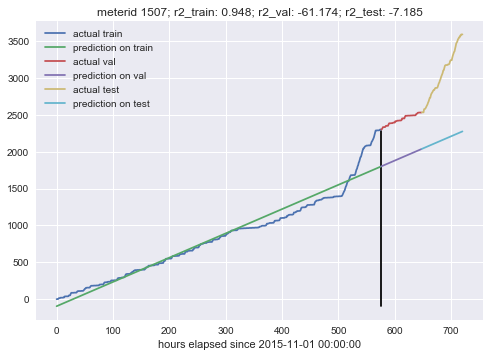

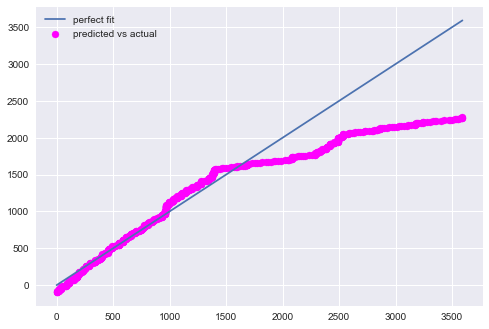

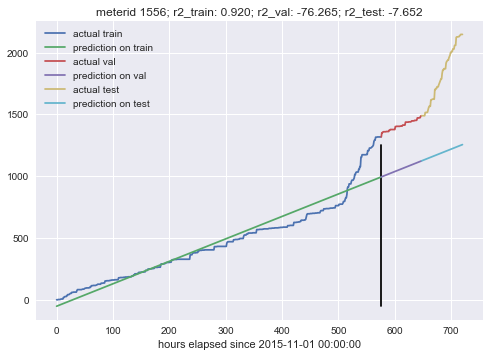

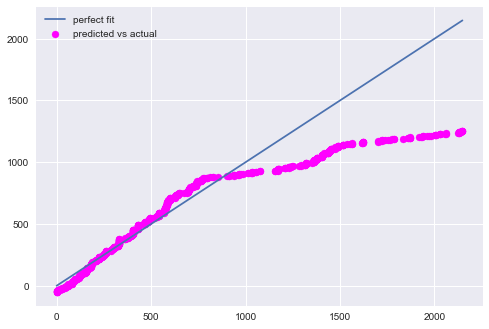

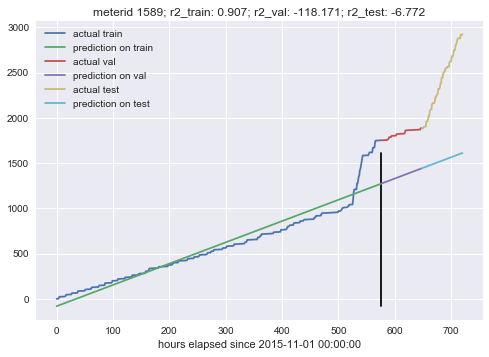

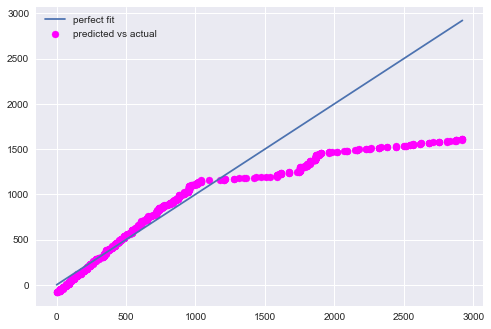

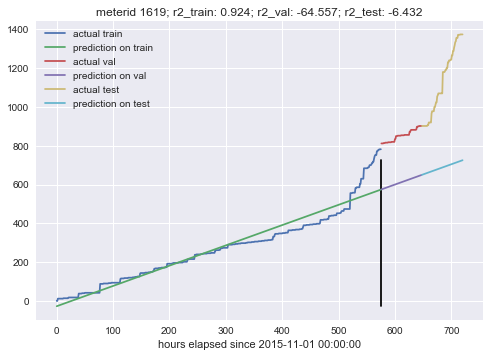

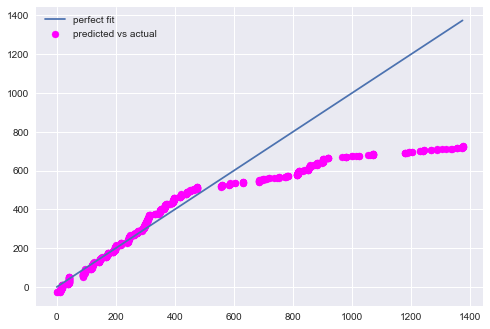

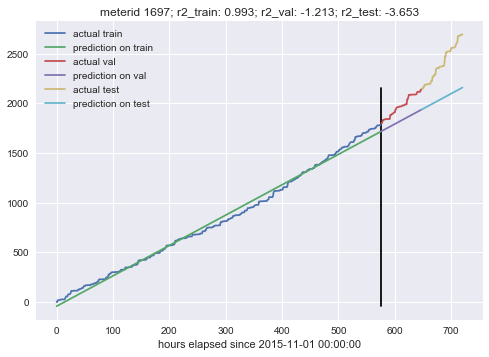

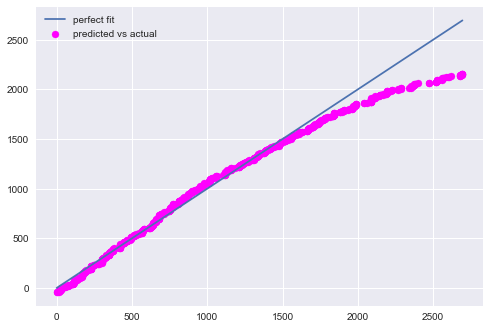

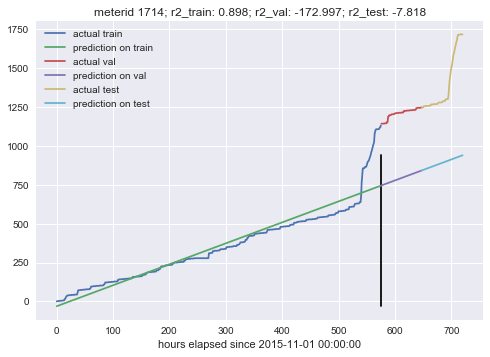

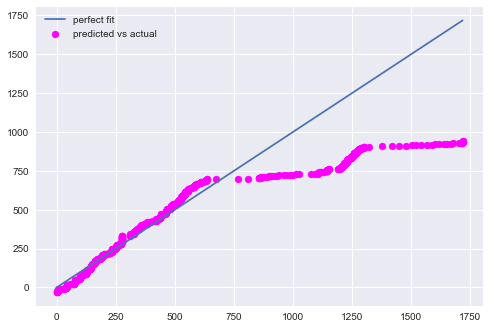

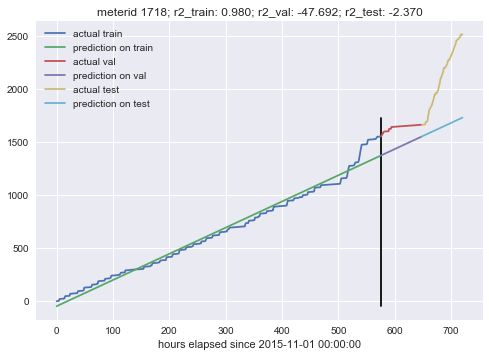

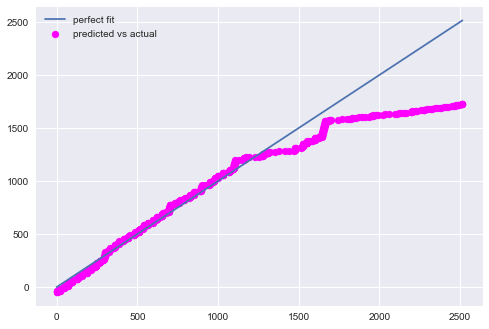

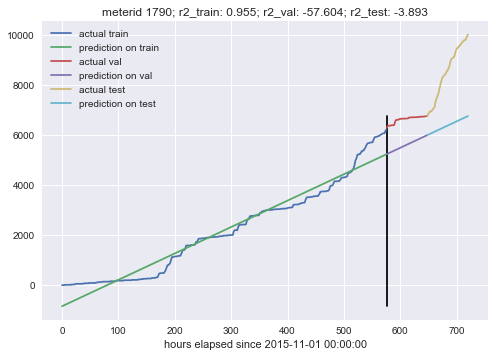

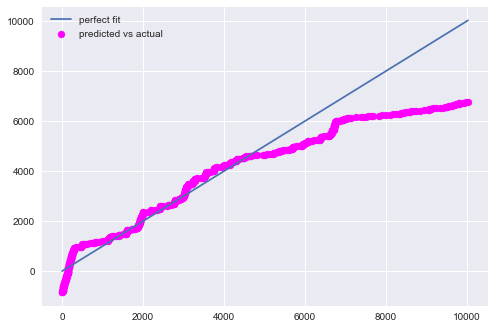

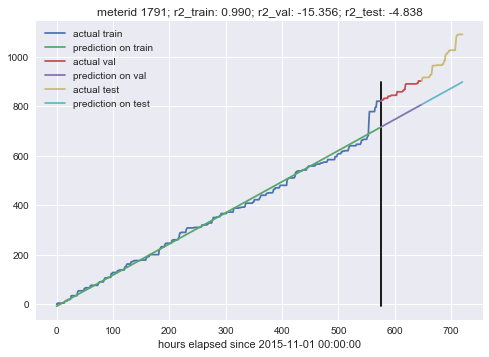

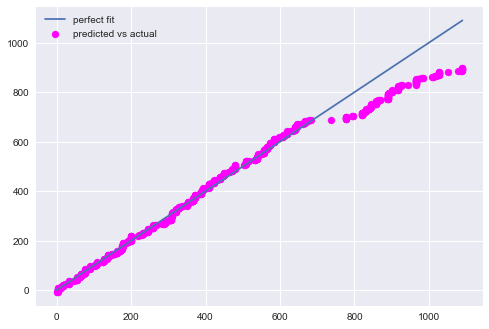

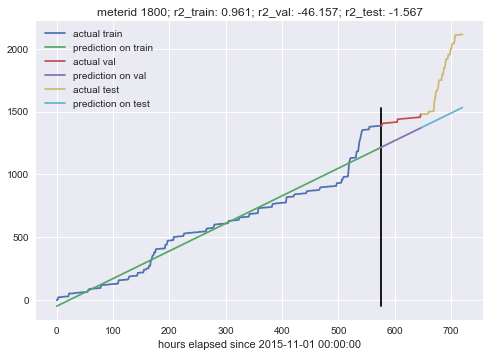

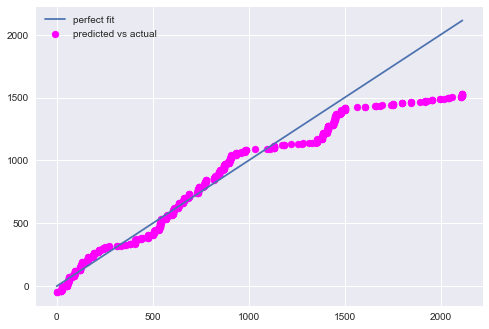

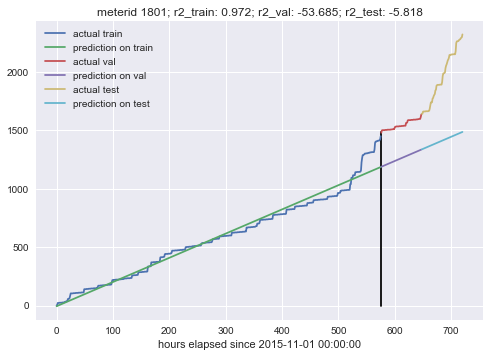

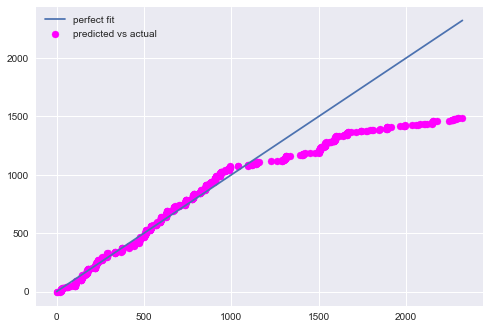

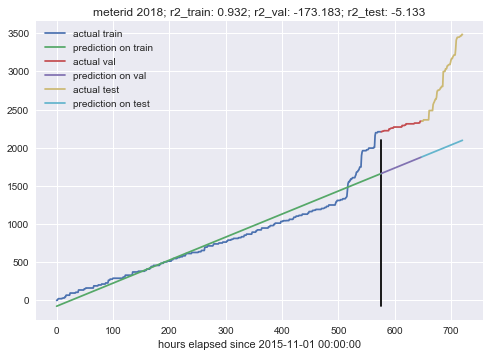

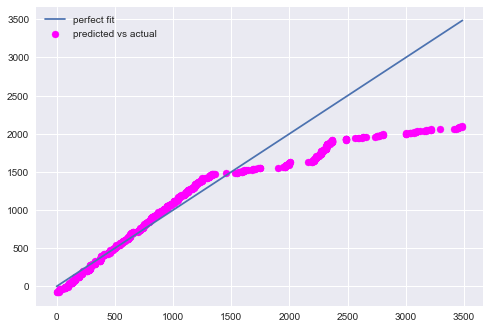

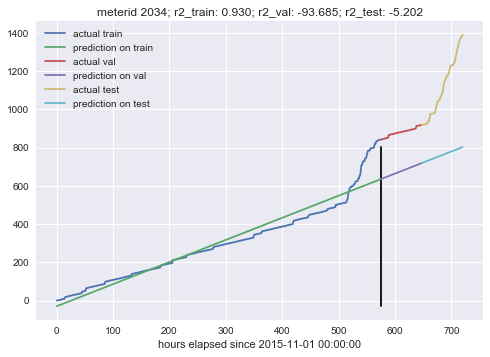

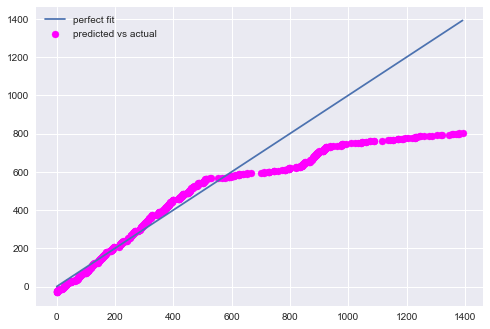

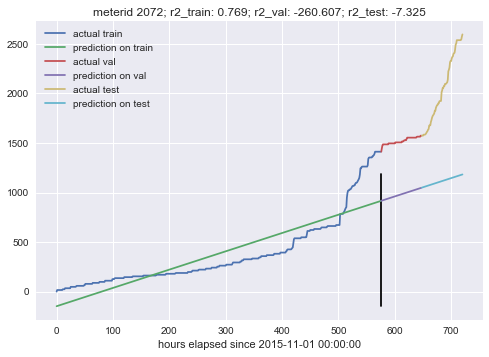

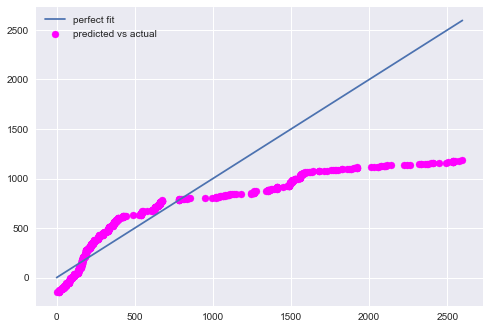

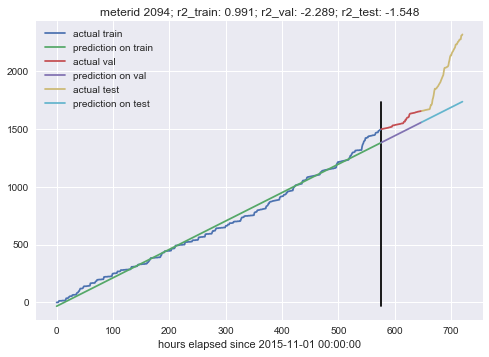

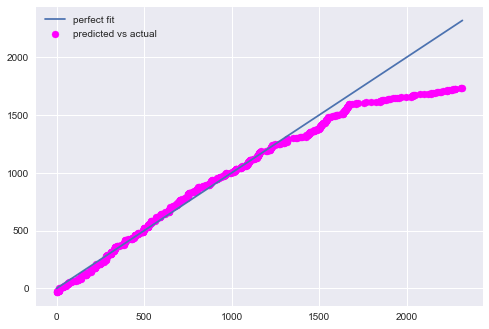

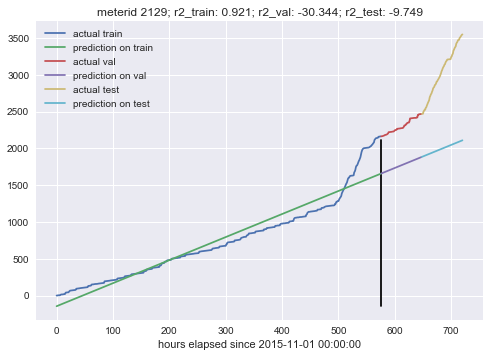

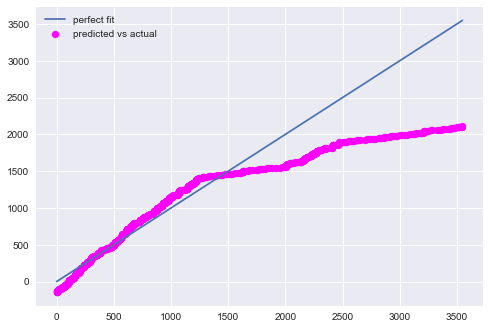

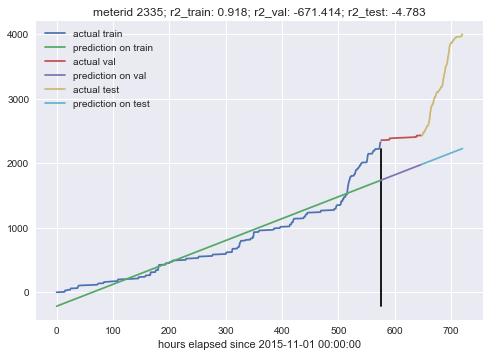

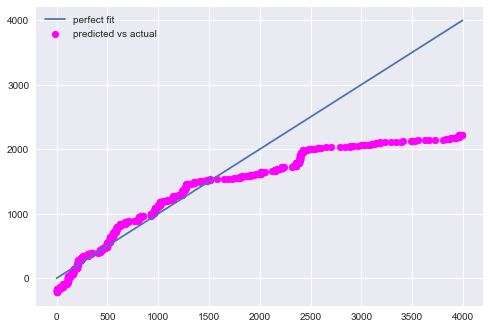

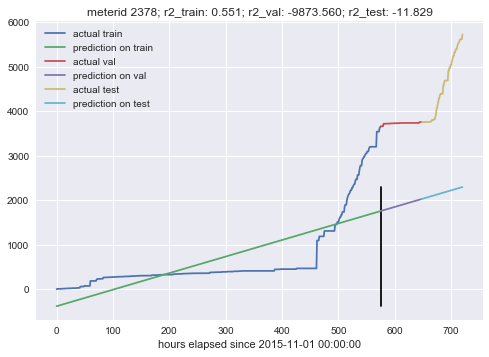

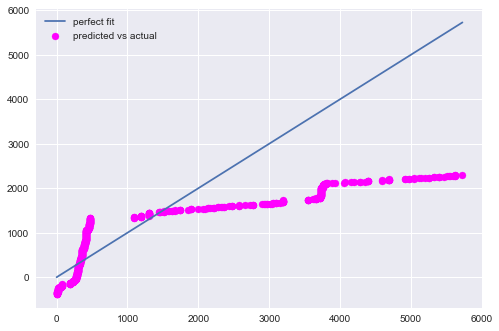

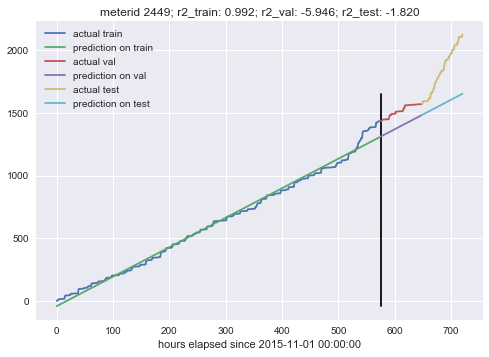

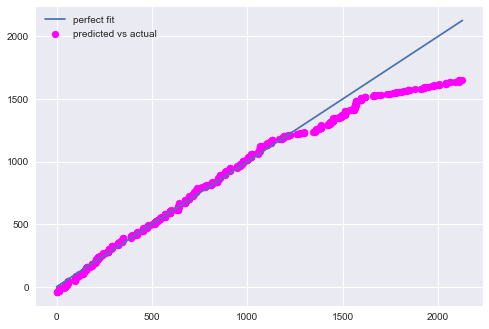

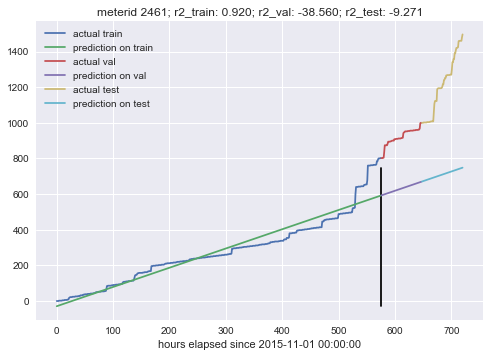

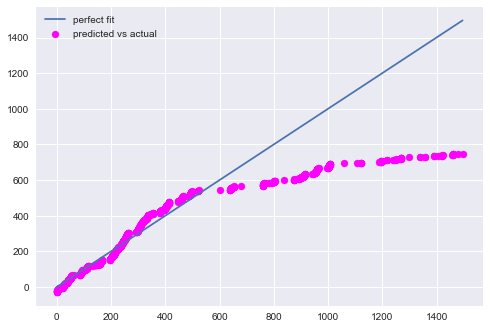

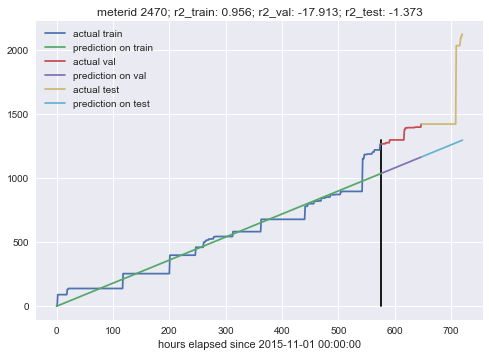

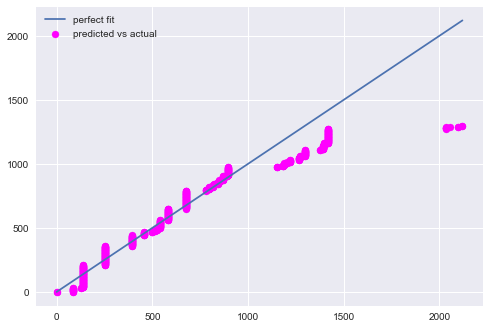

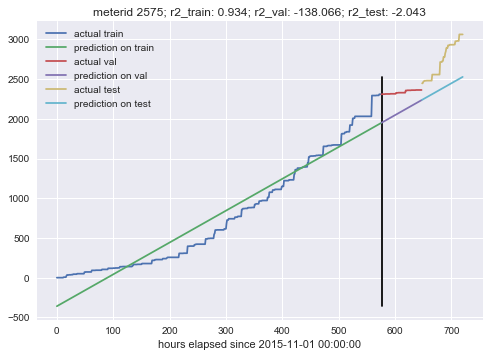

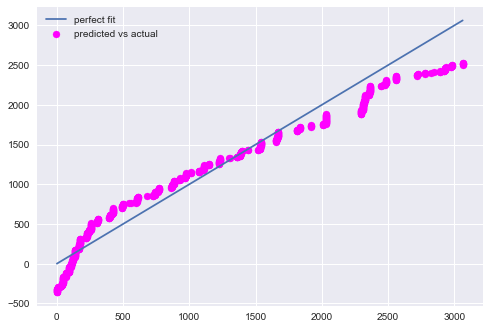

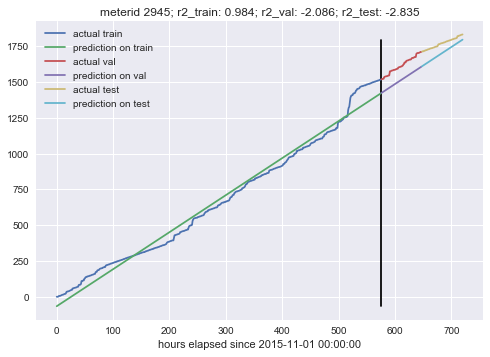

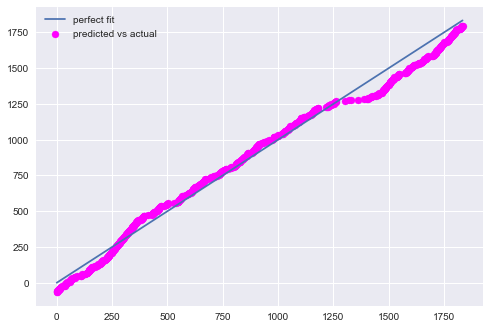

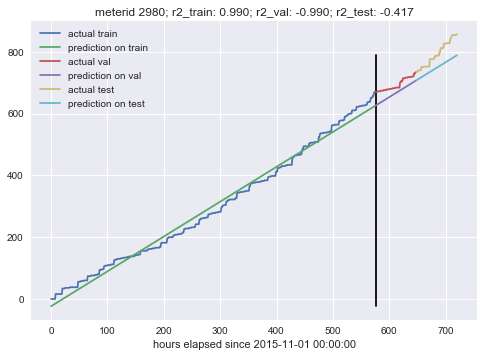

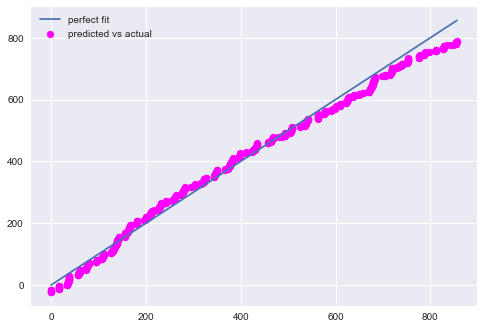

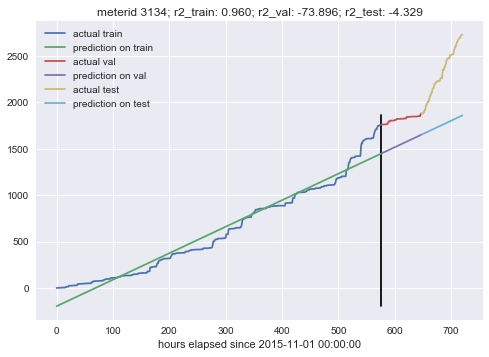

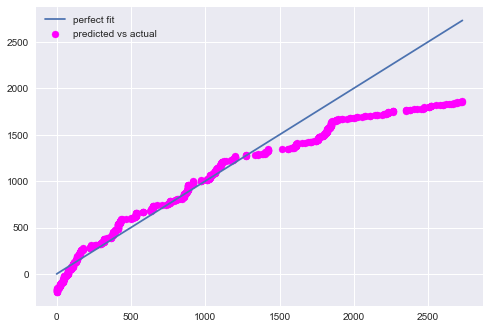

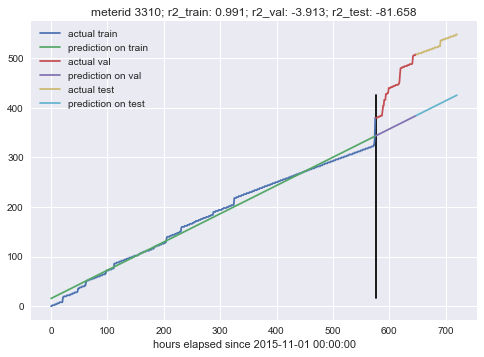

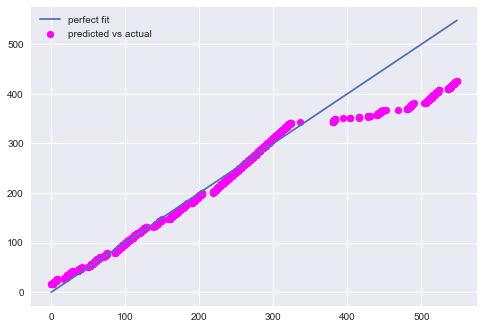

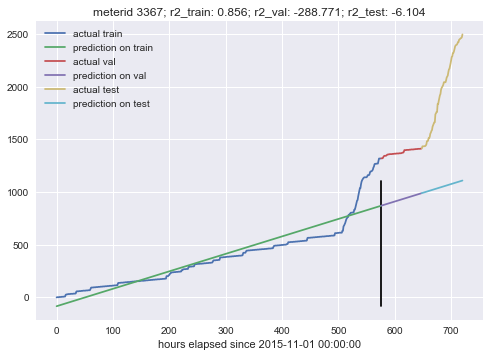

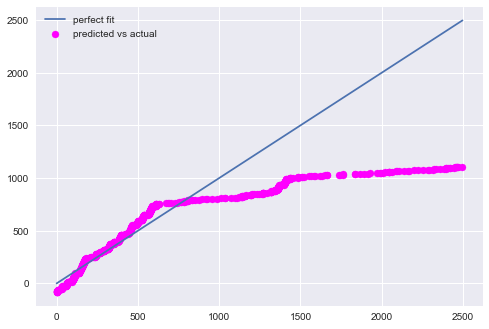

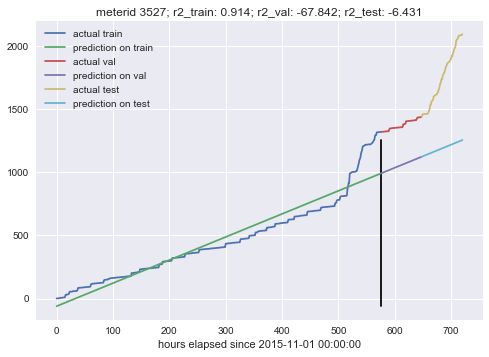

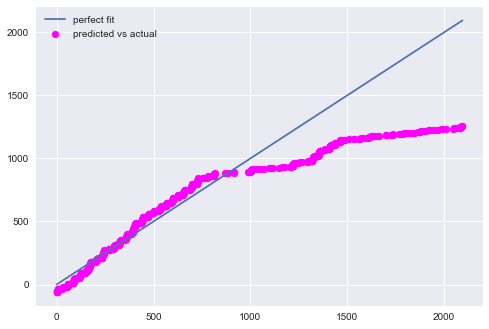

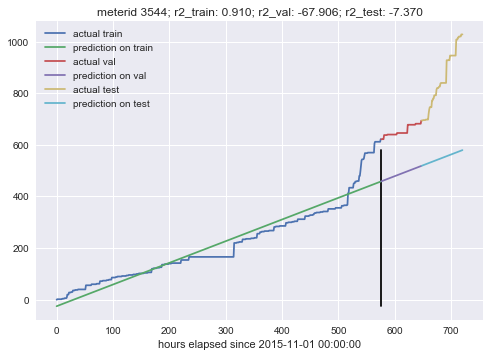

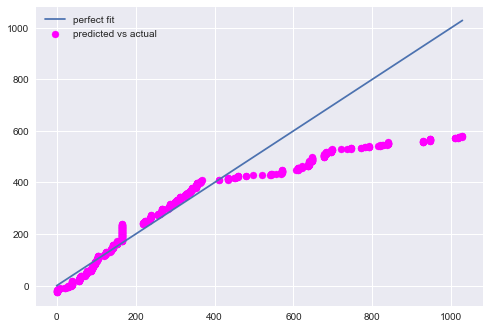

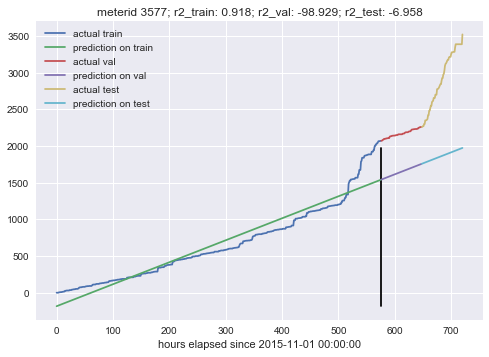

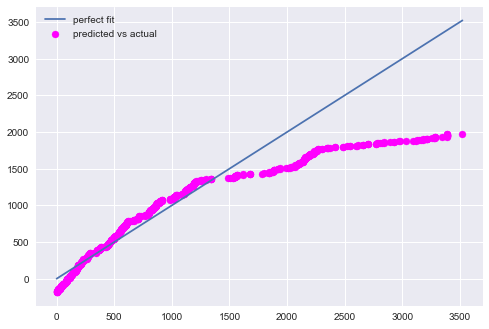

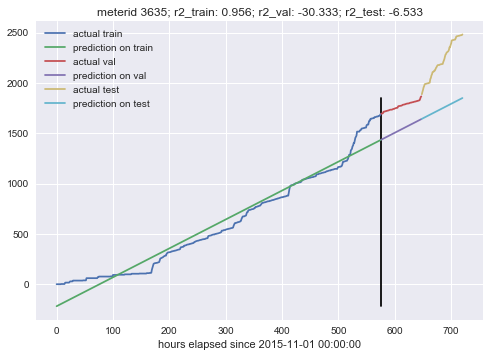

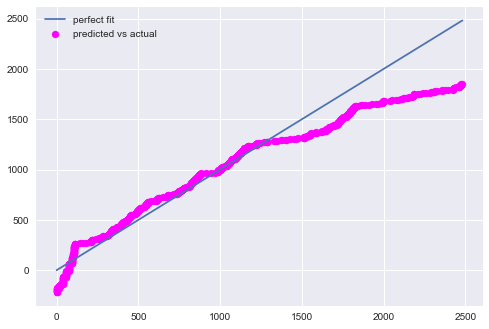

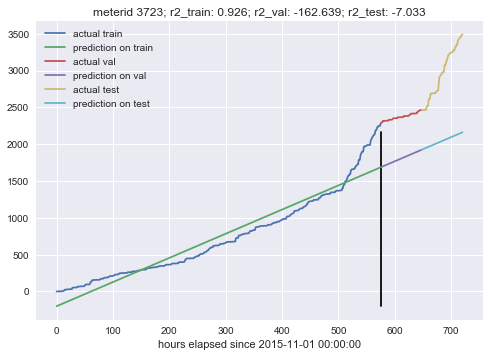

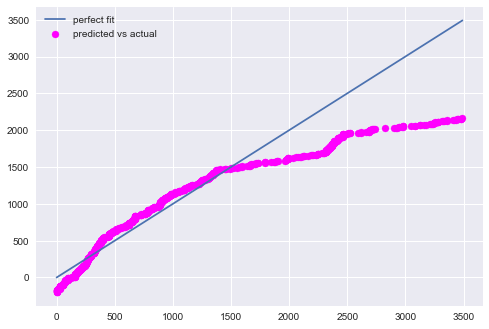

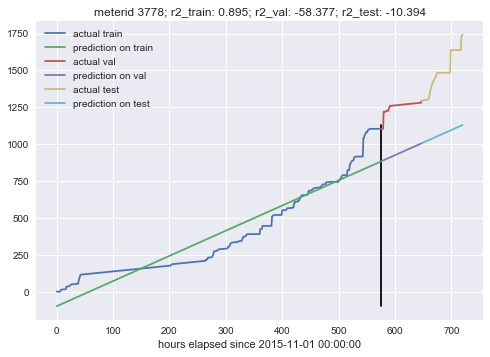

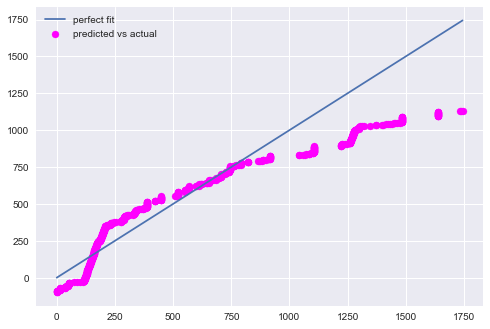

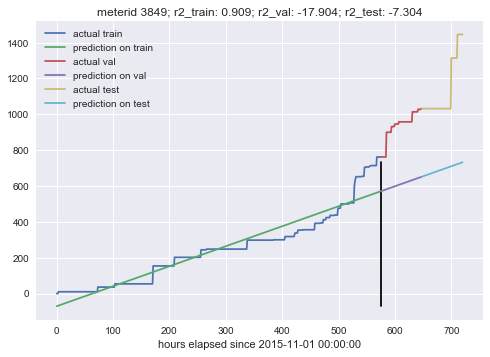

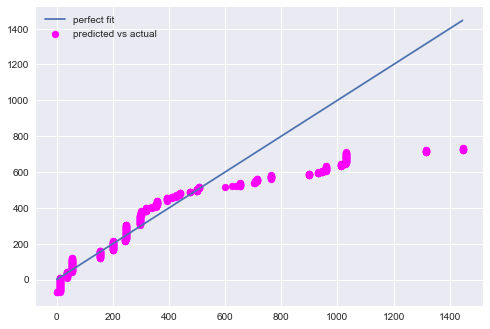

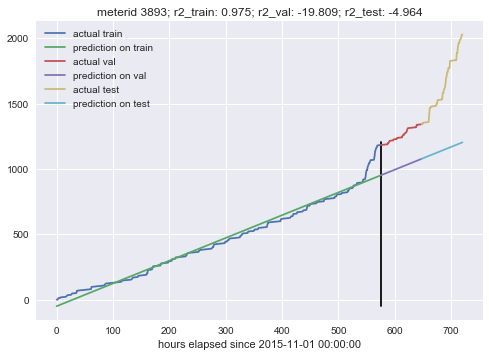

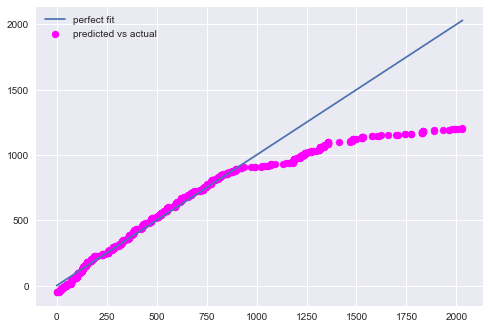

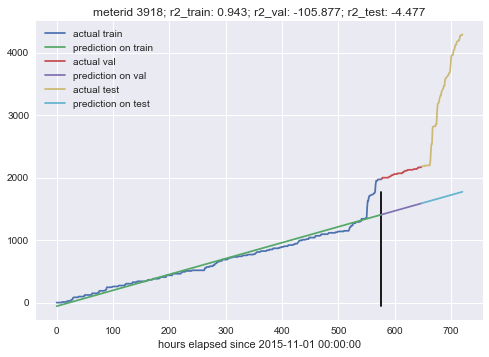

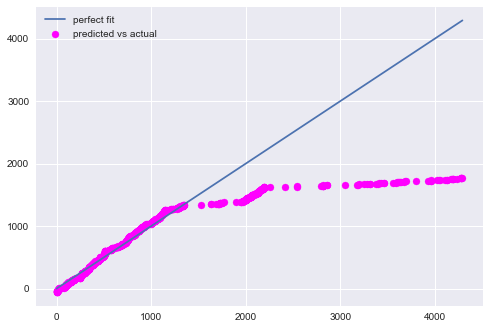

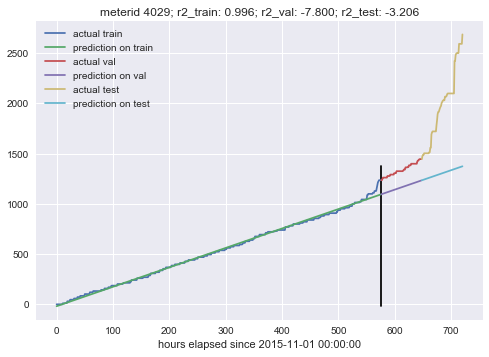

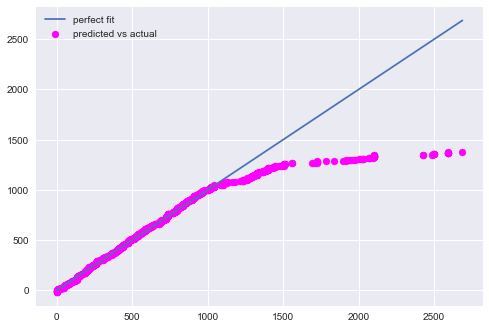

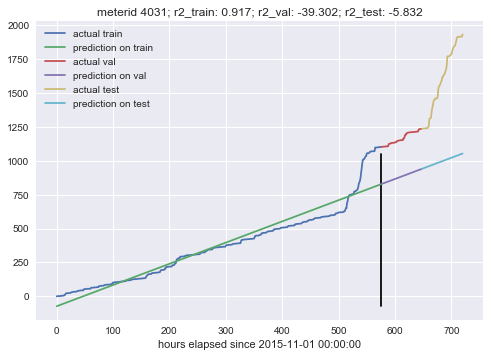

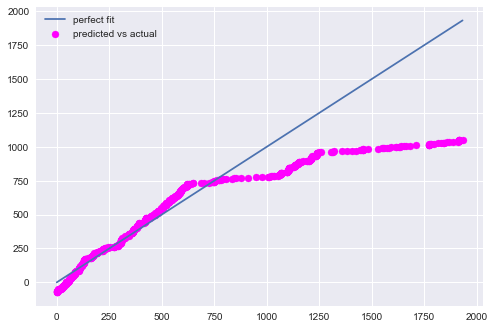

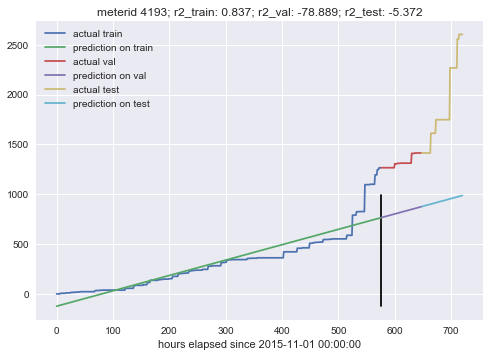

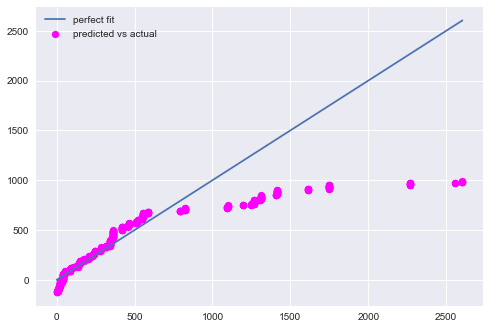

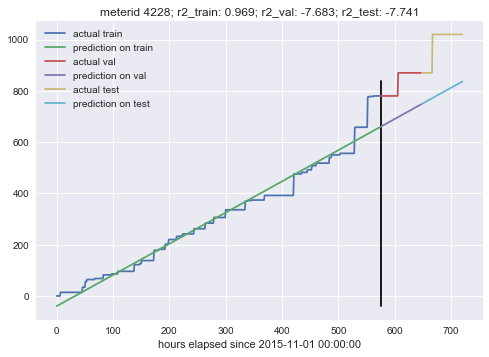

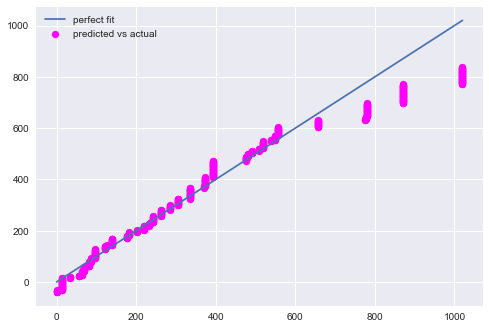

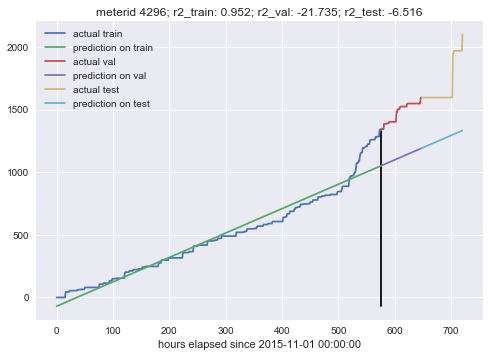

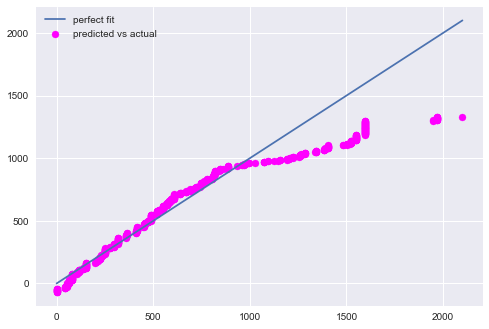

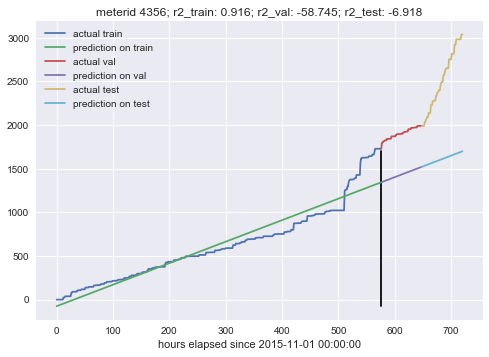

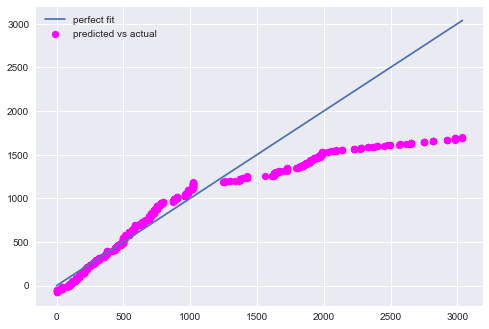

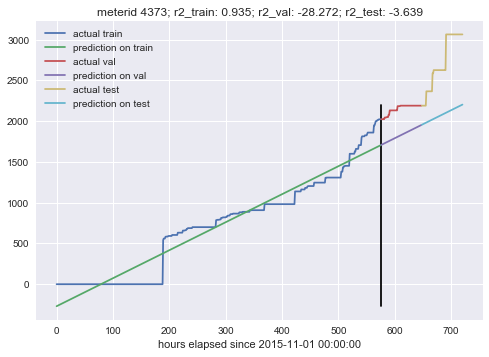

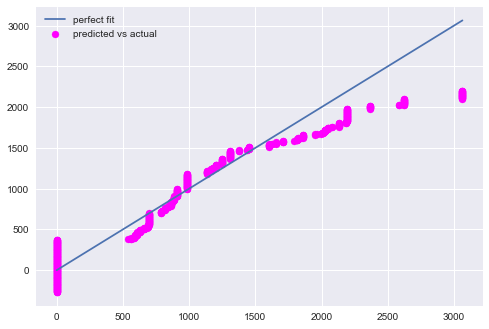

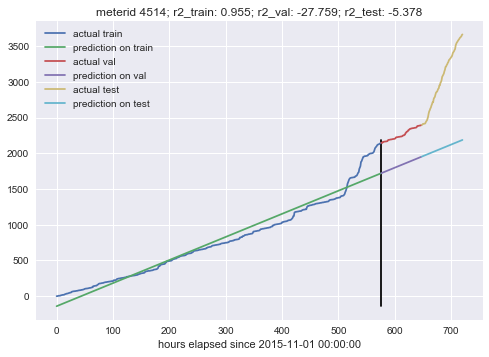

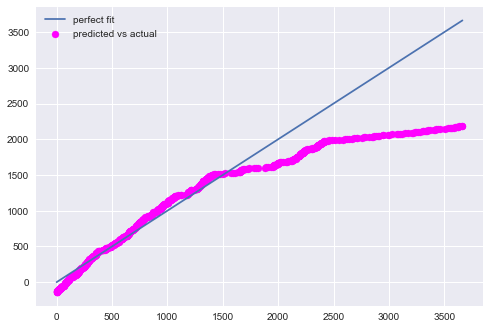

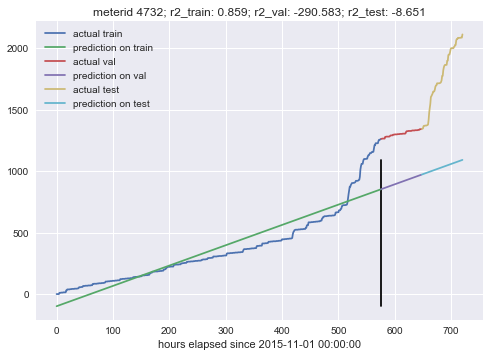

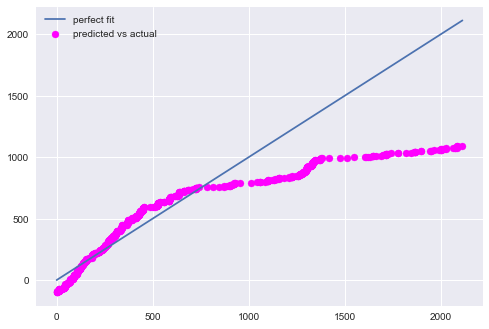

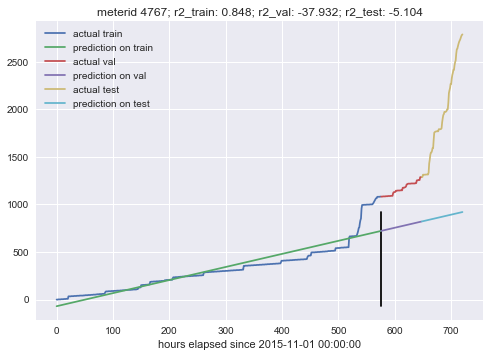

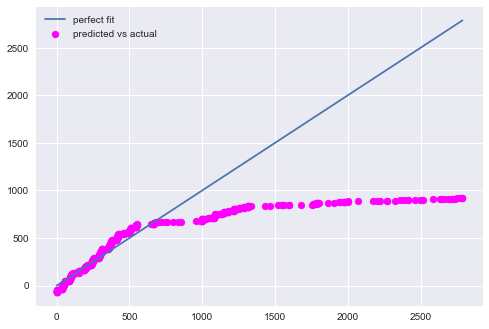

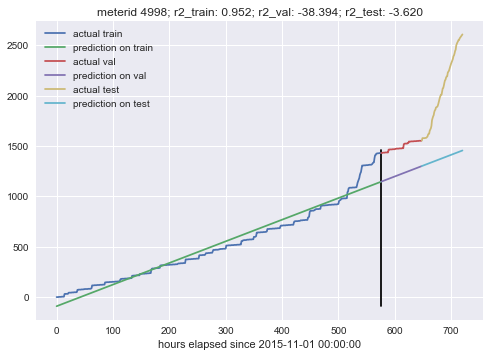

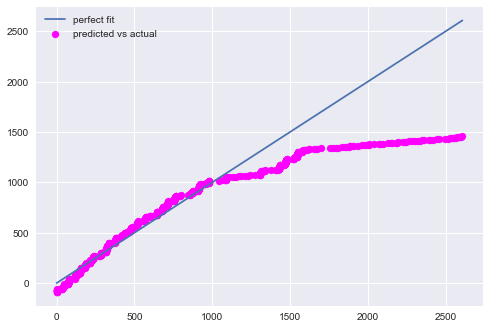

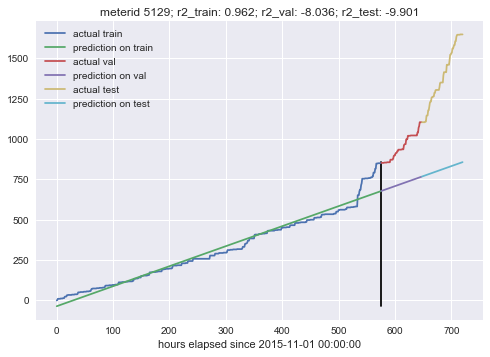

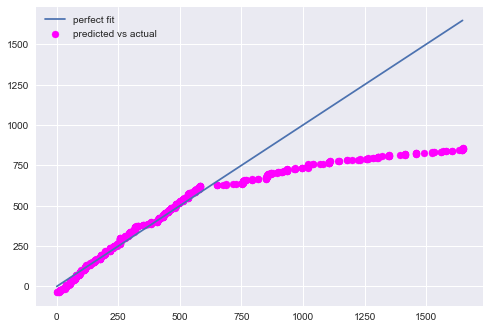

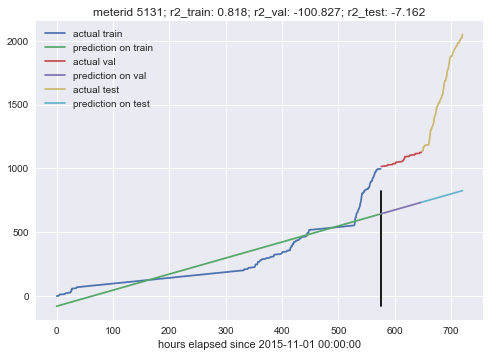

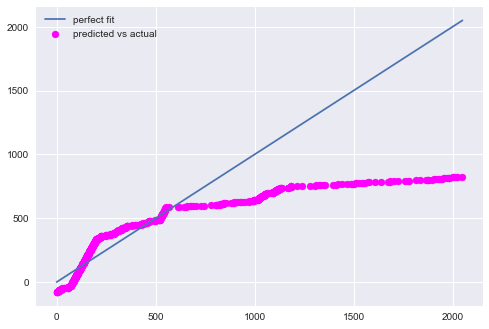

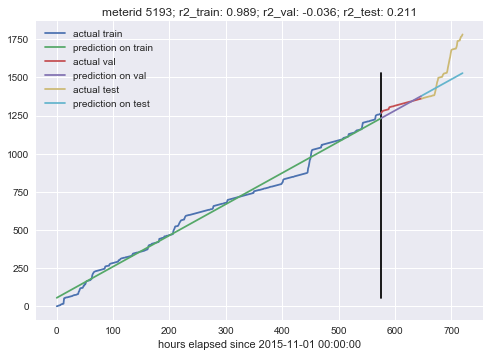

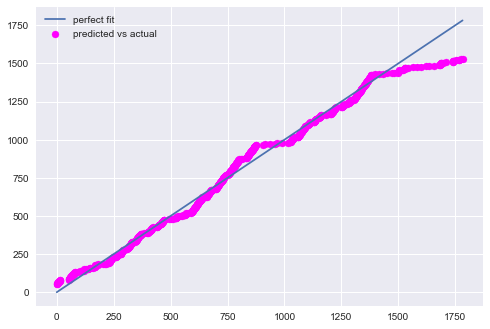

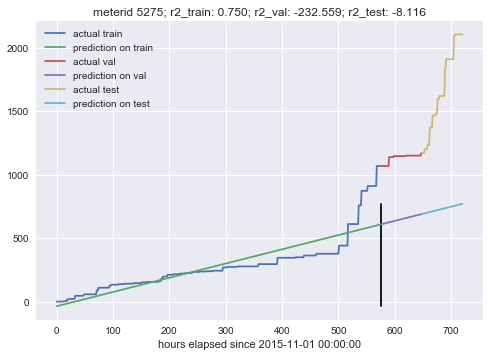

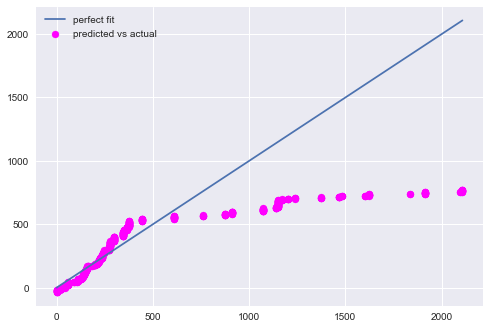

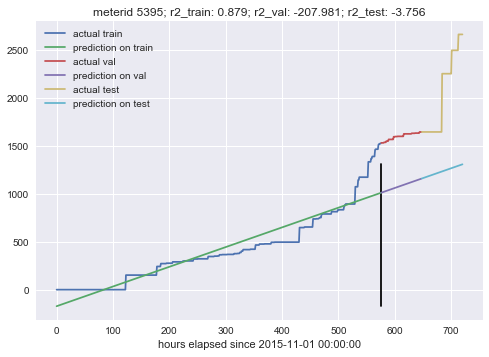

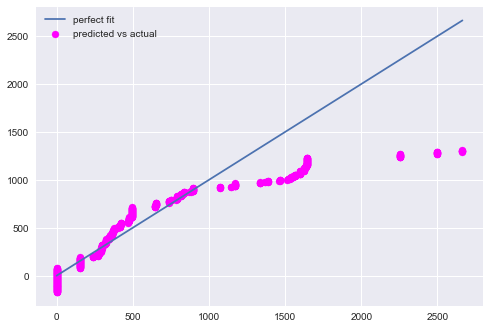

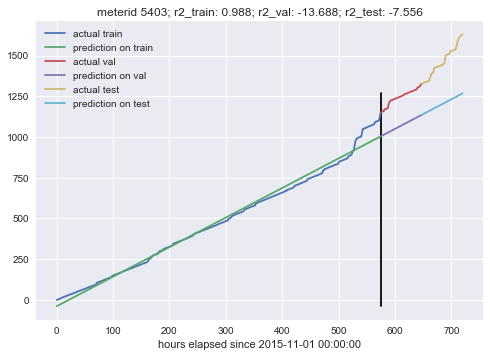

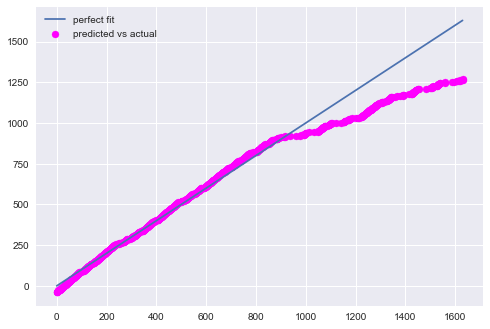

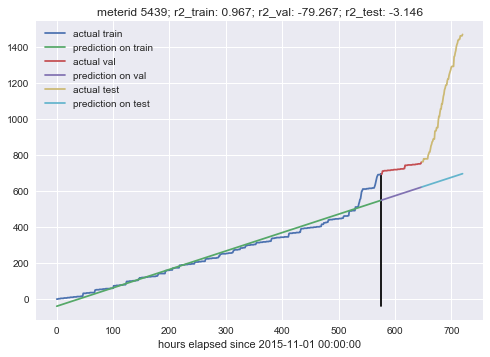

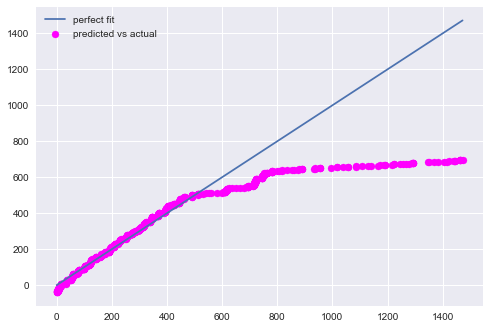

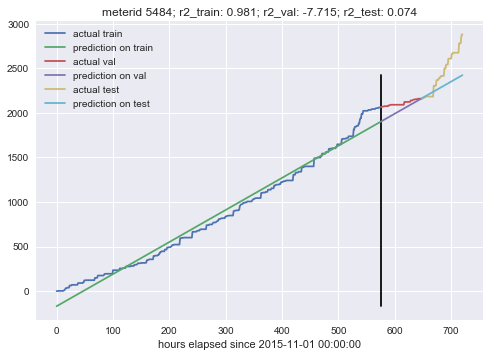

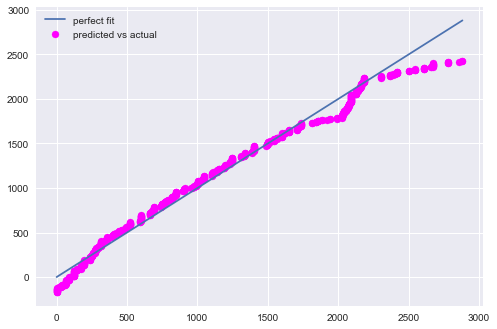

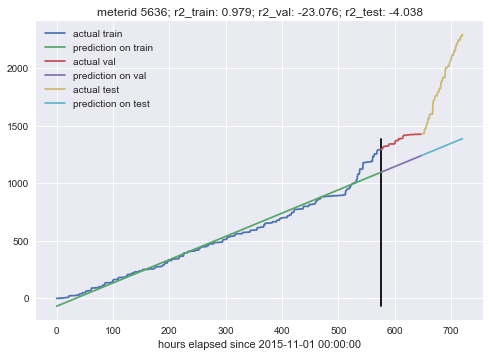

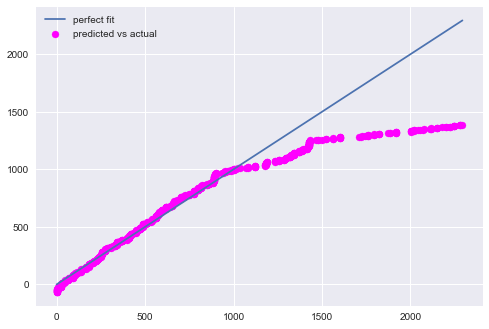

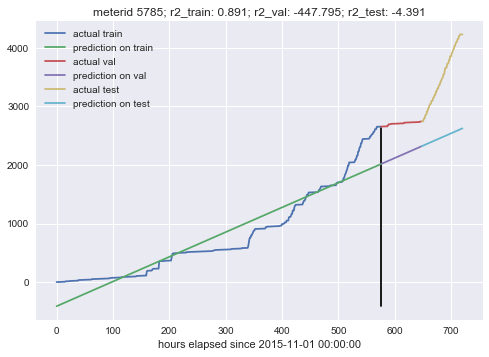

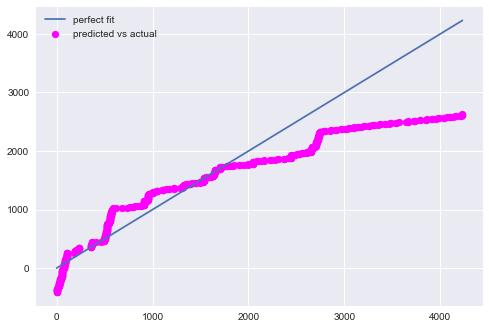

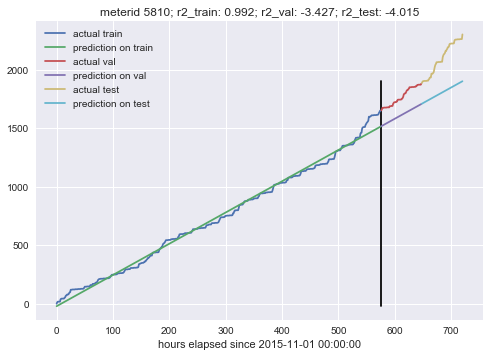

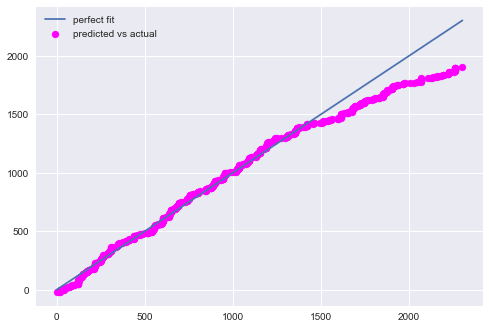

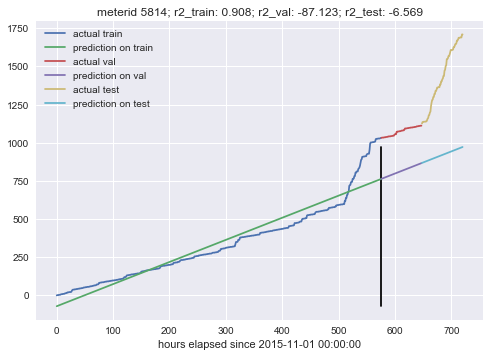

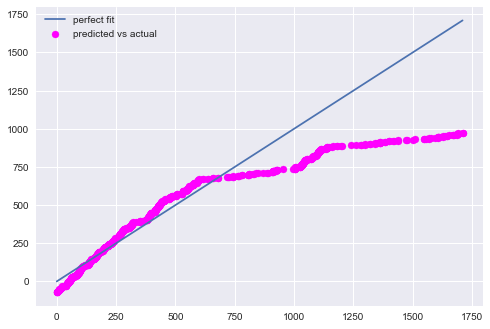

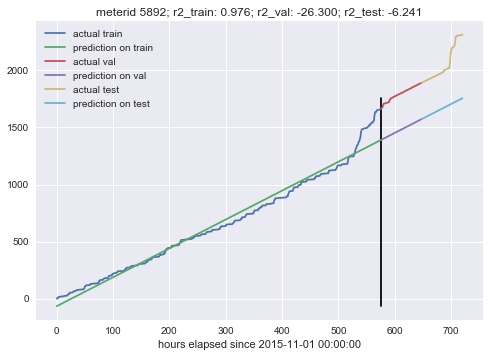

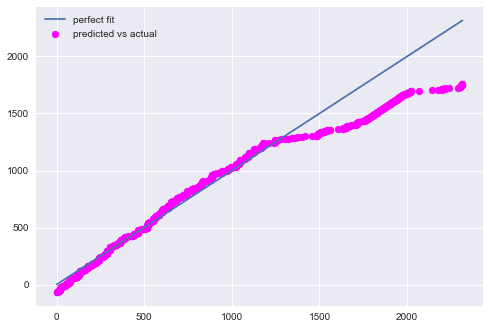

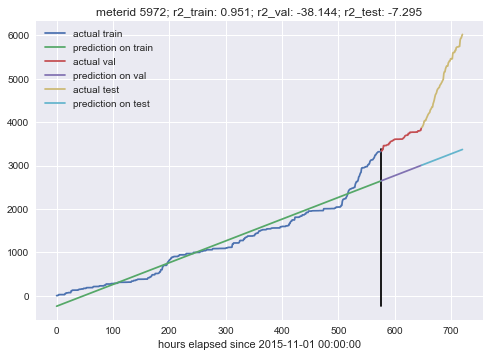

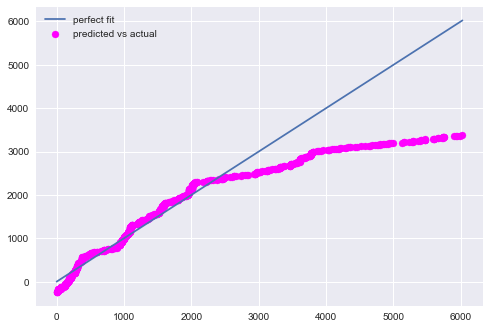

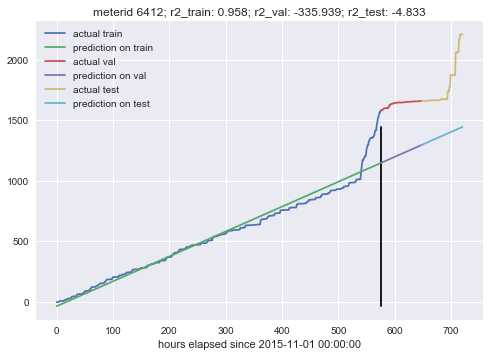

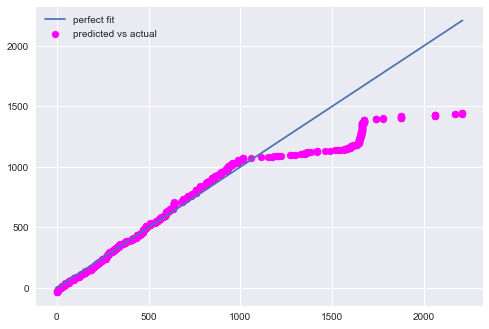

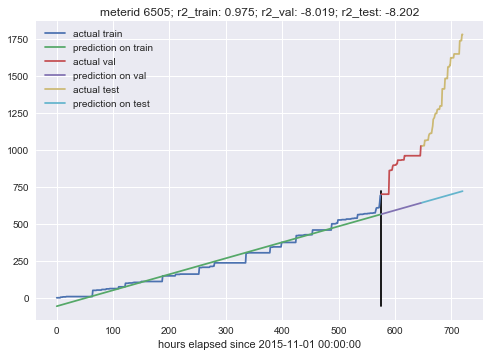

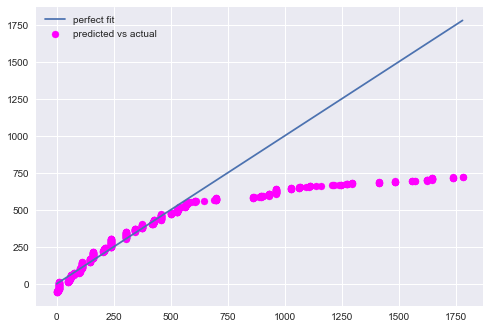

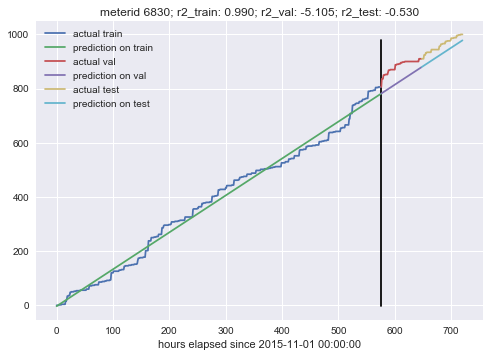

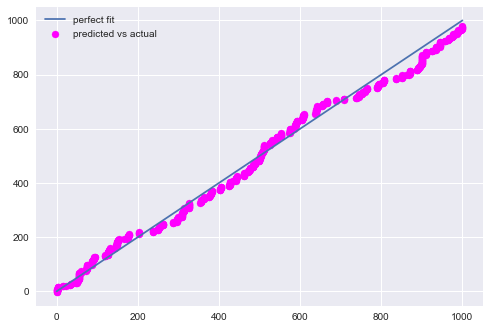

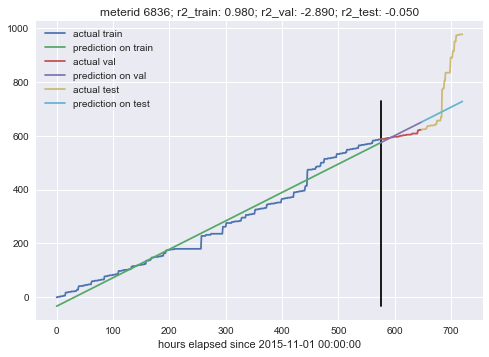

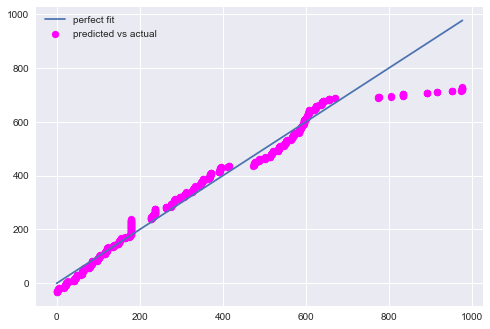

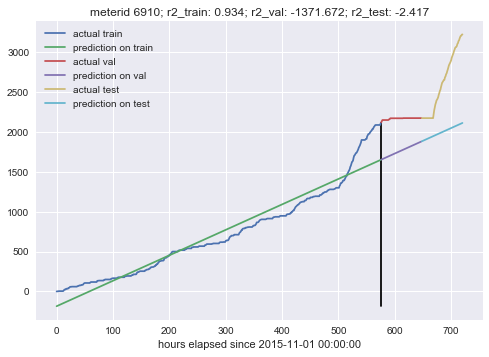

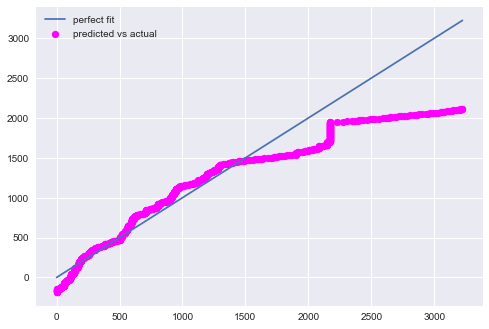

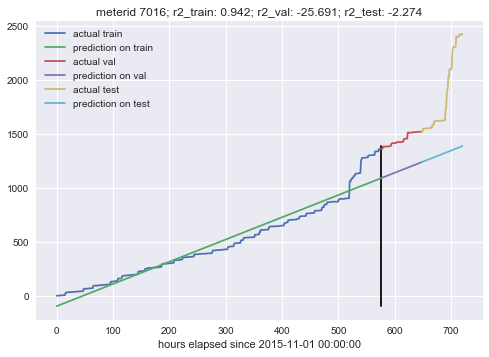

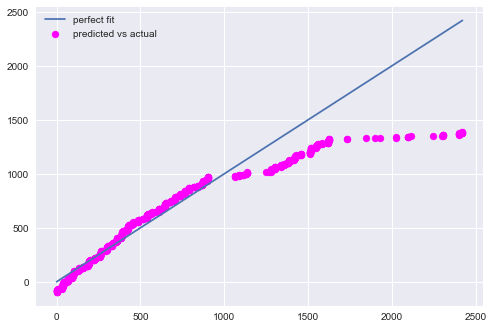

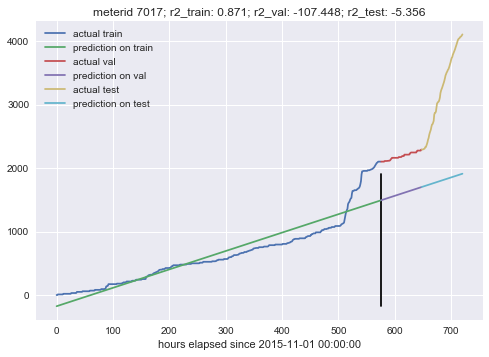

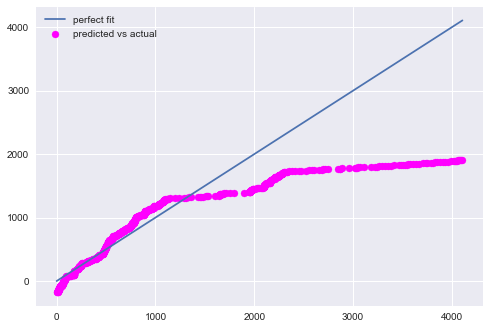

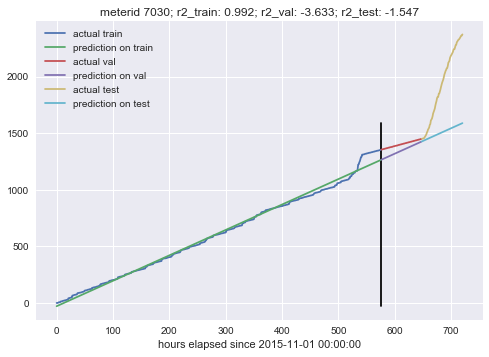

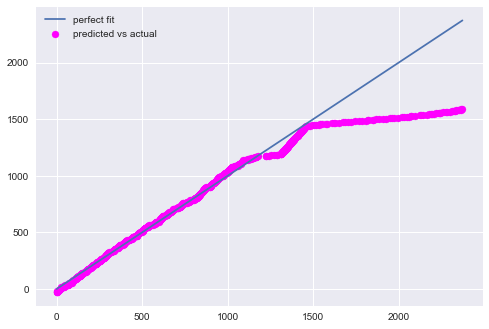

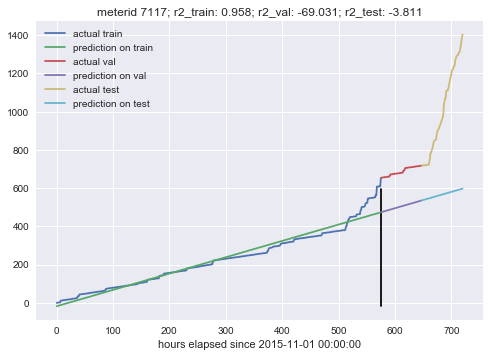

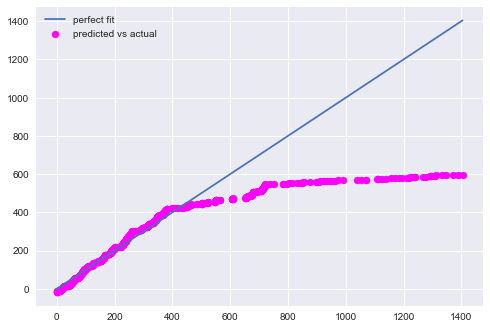

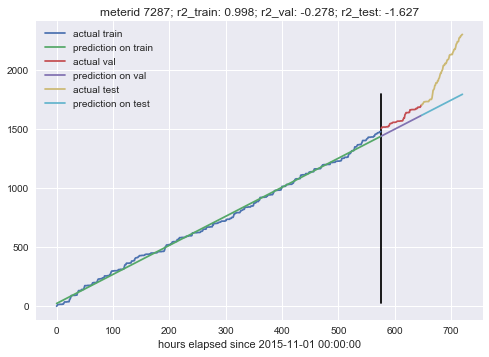

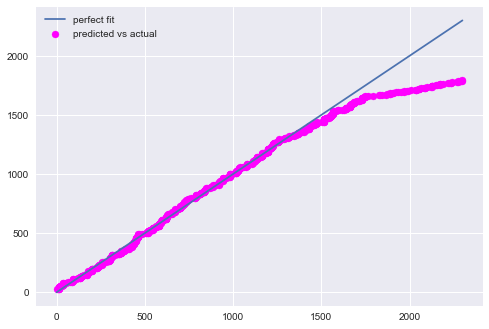

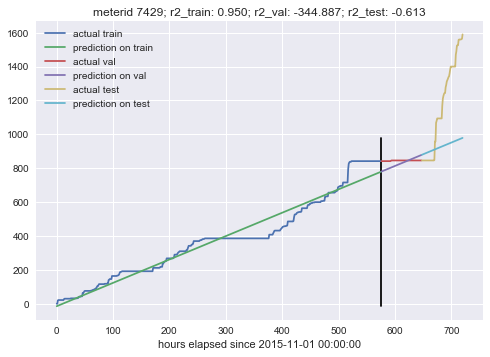

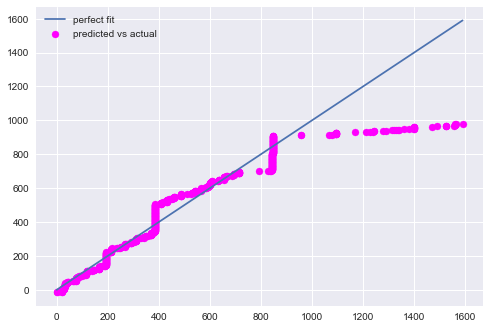

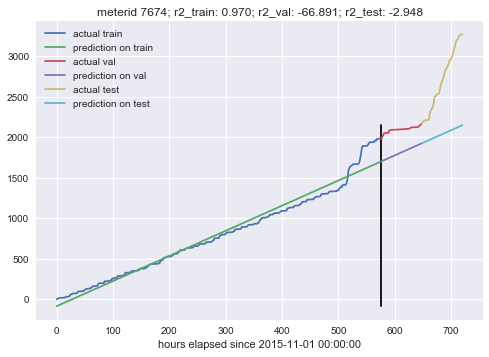

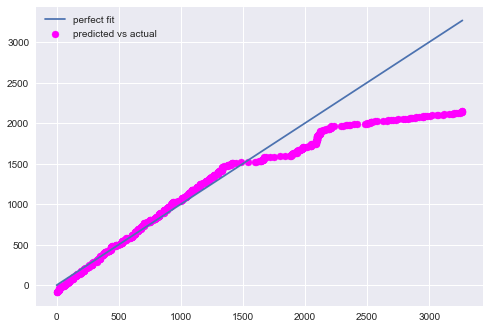

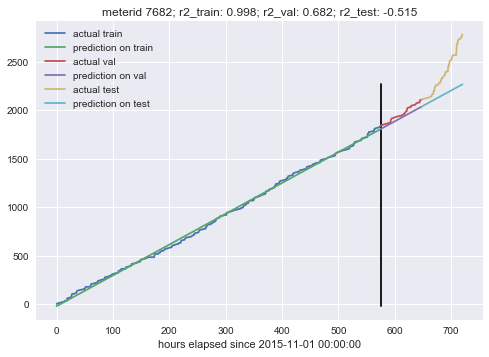

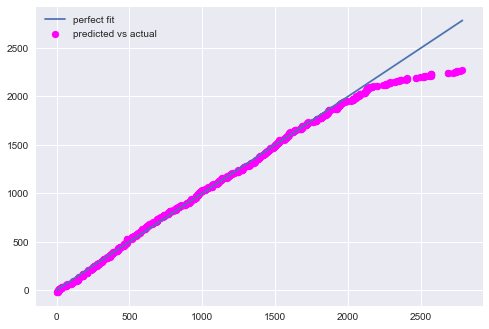

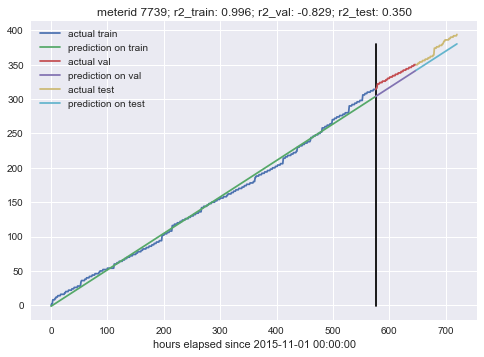

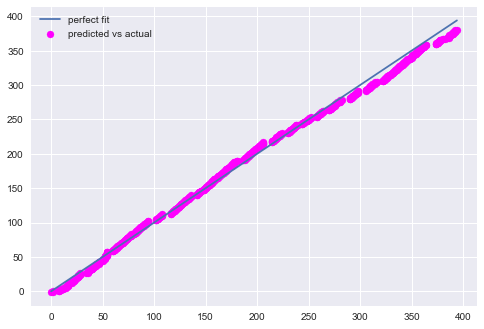

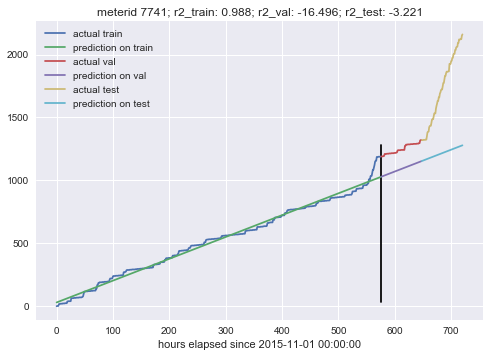

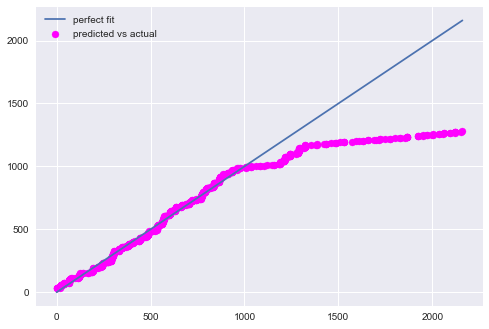

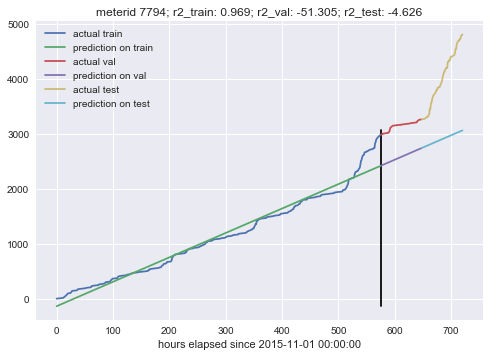

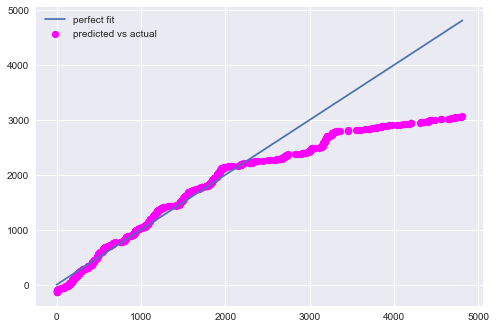

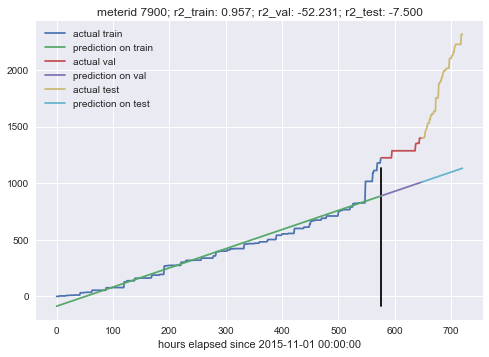

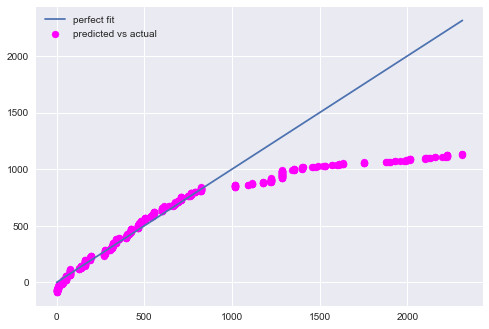

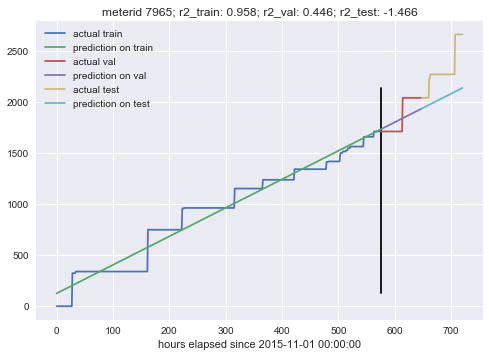

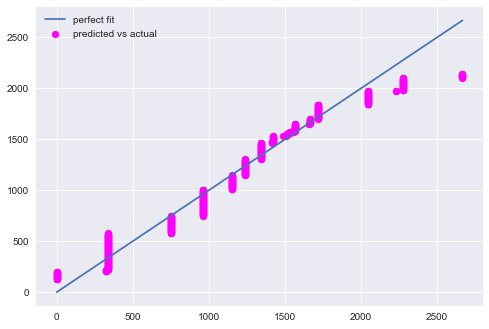

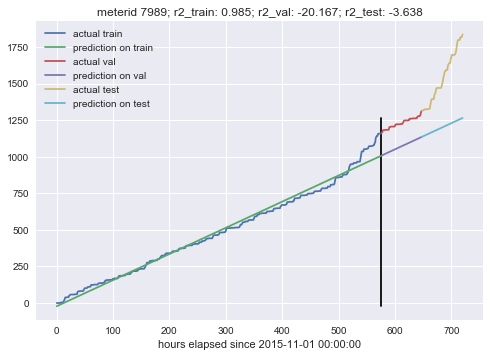

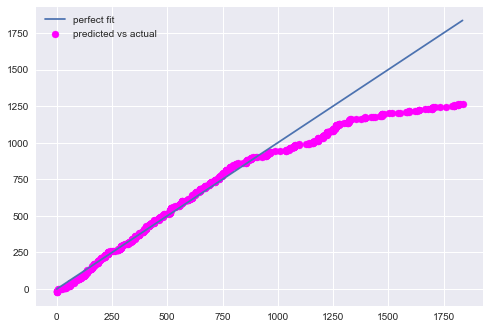

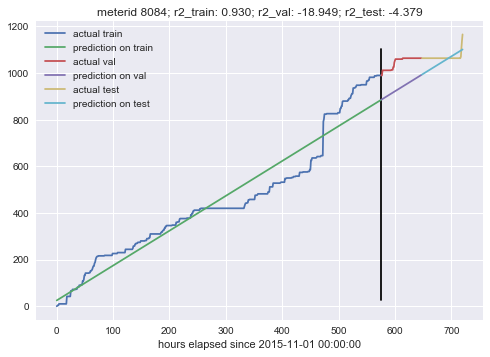

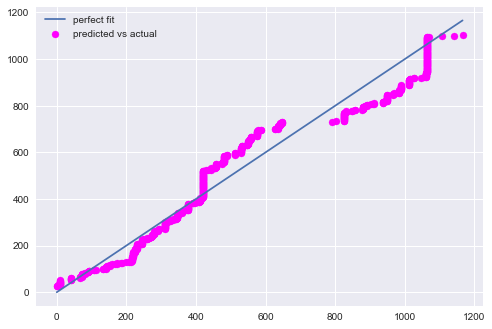

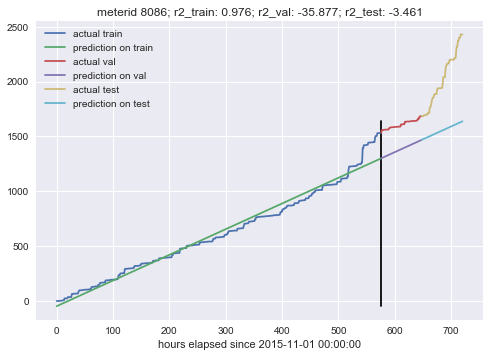

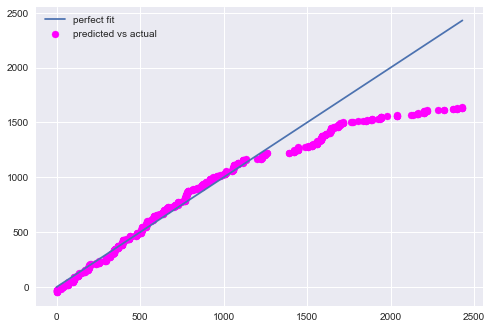

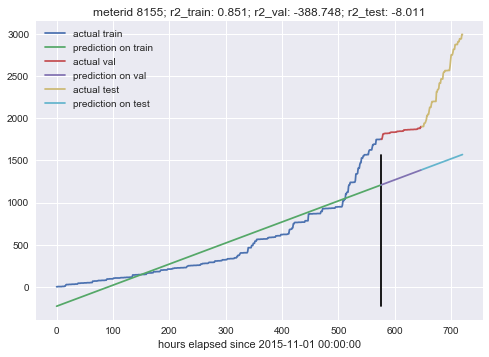

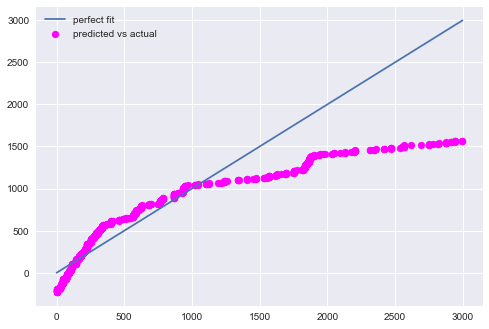

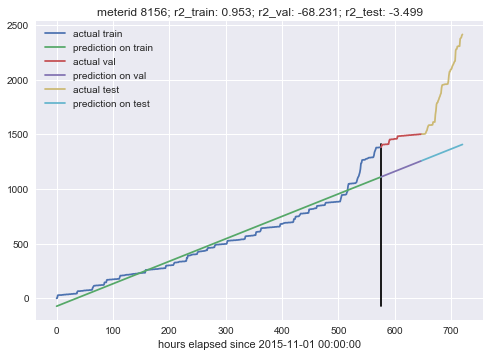

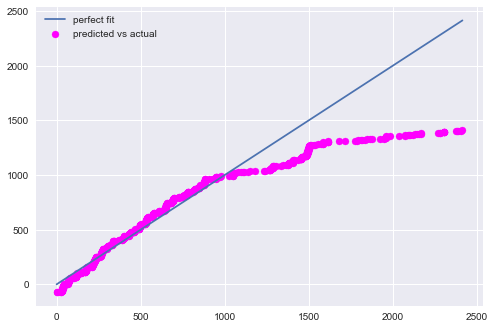

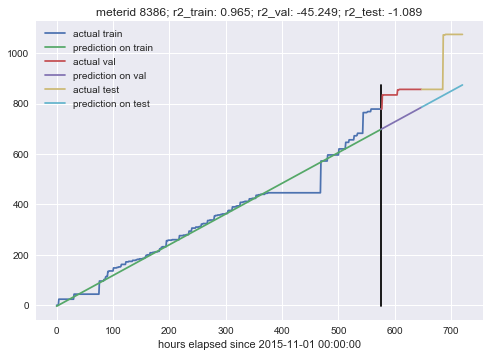

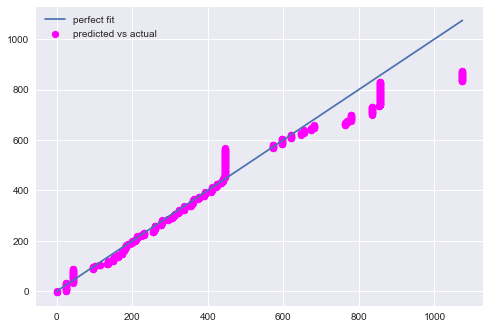

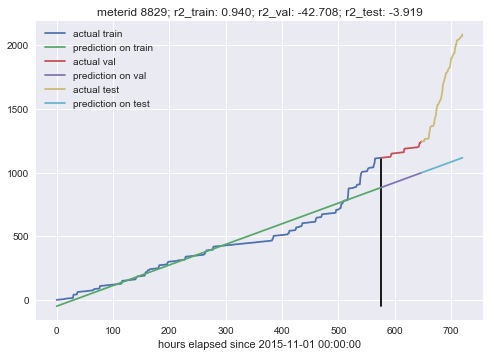

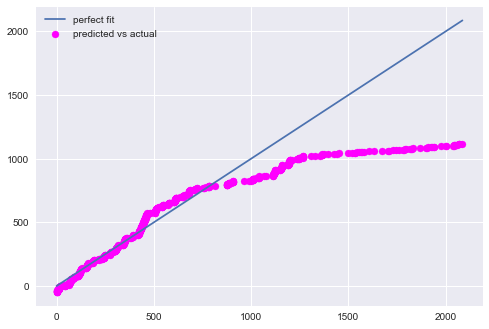

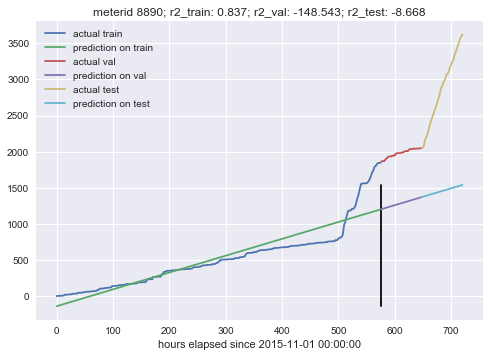

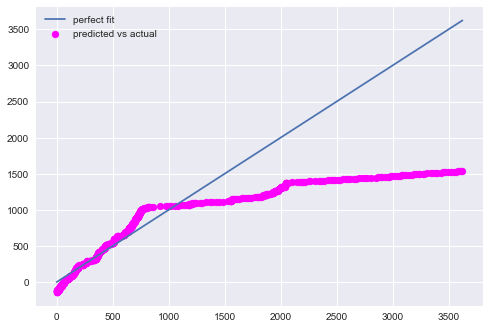

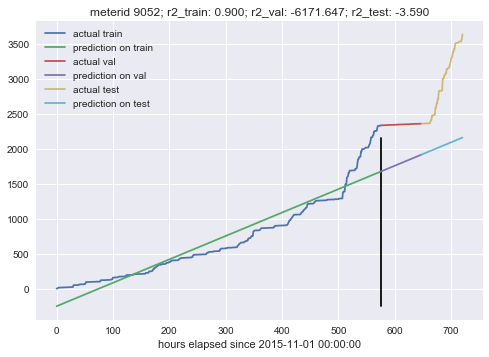

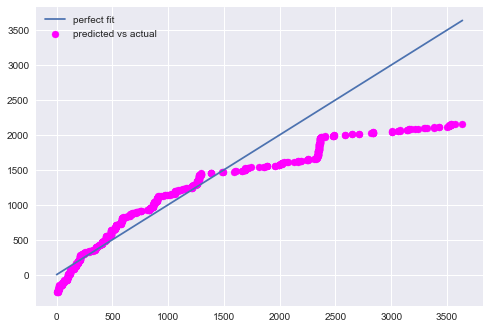

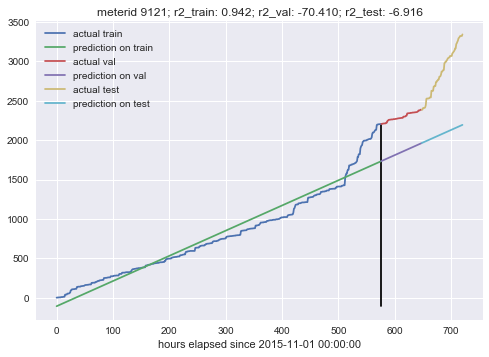

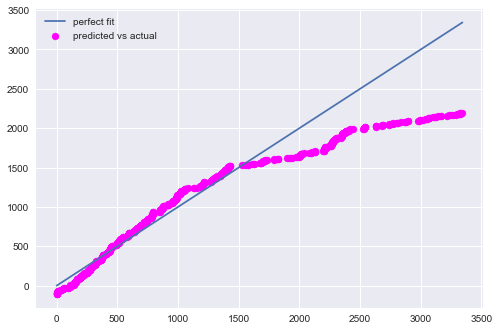

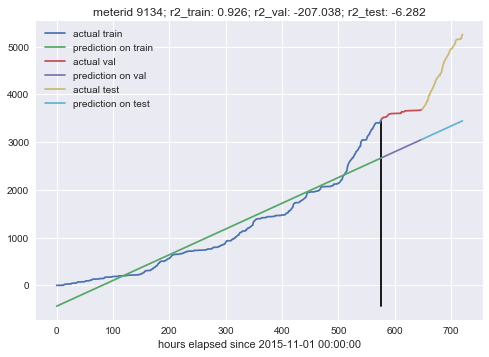

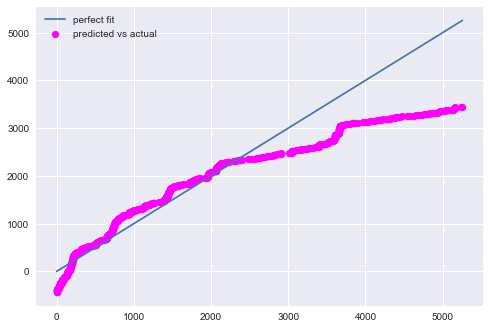

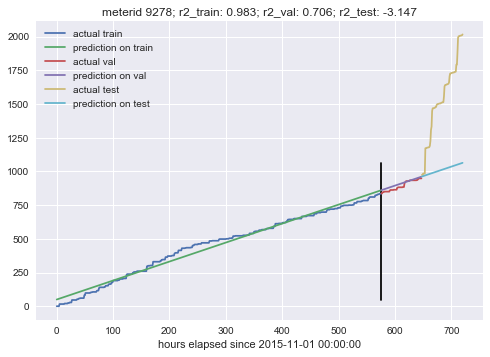

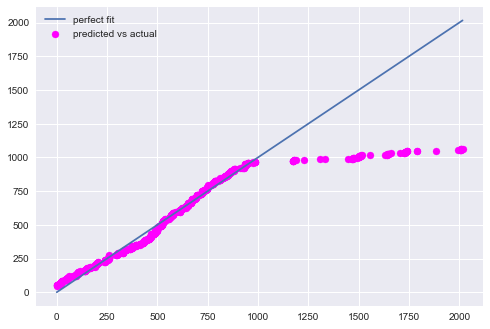

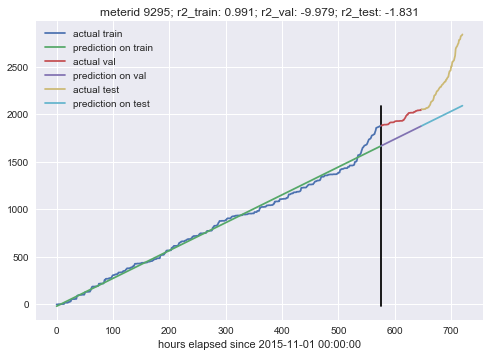

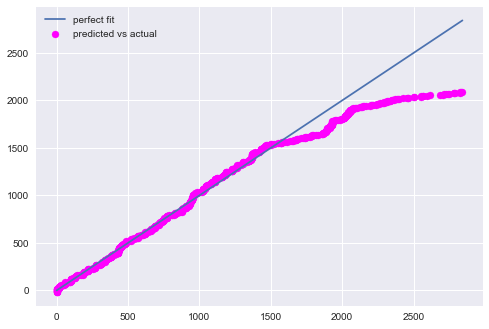

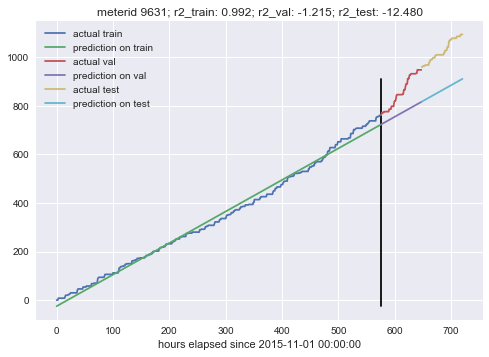

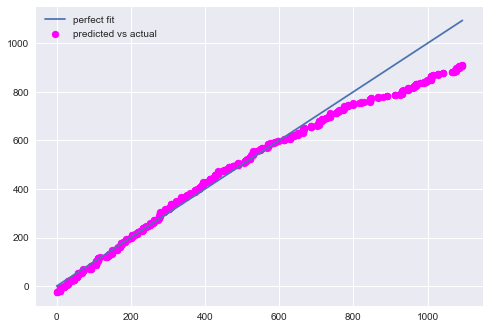

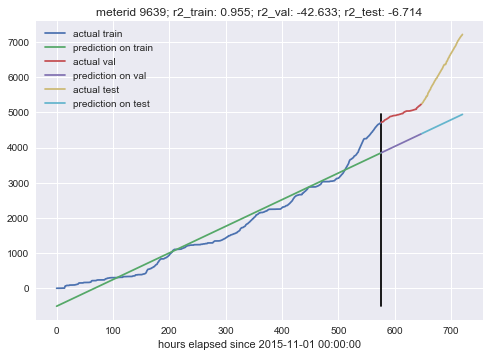

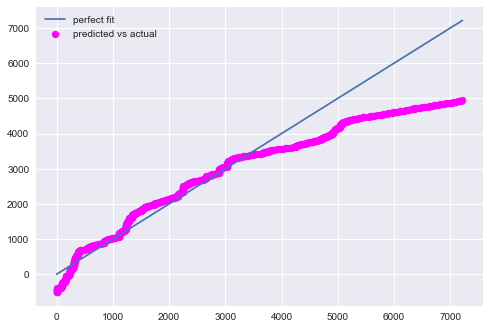

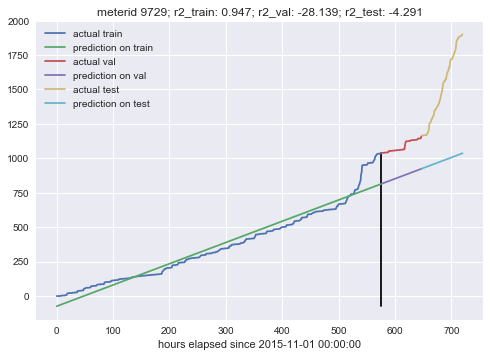

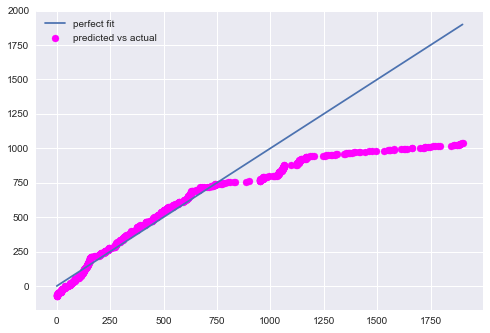

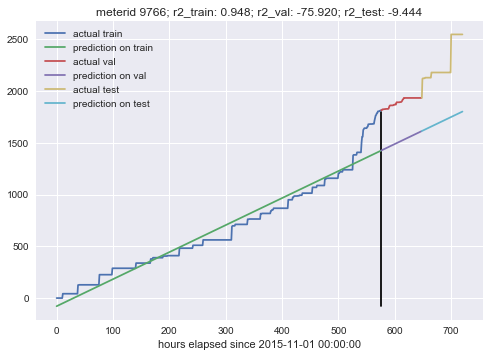

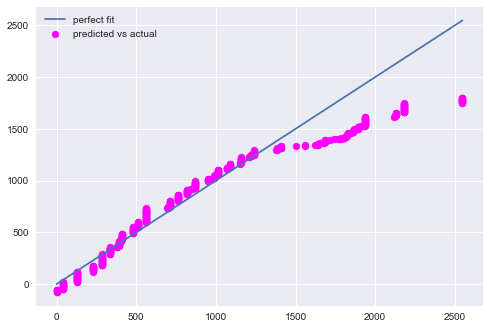

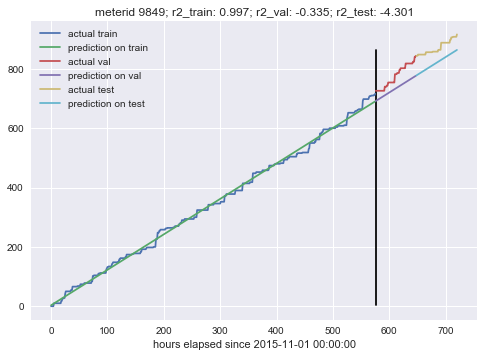

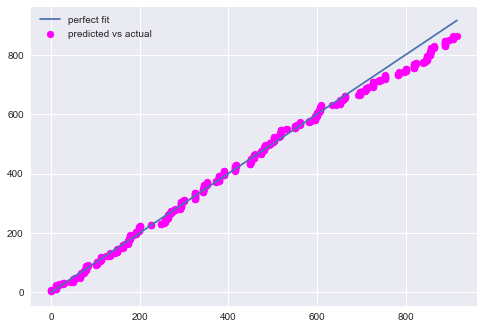

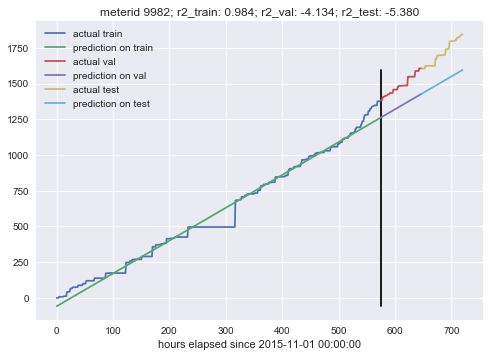

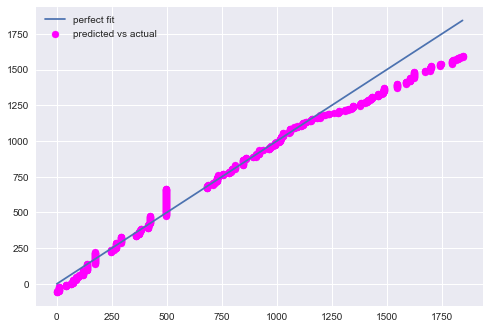

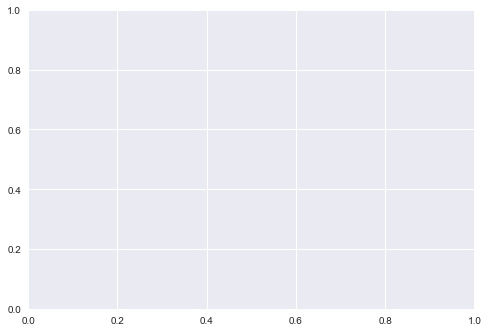

In [16]:
coeffs = []
scores = []
show_plot = True

for meterid in new_id_list:
    df_i = new_groups.get_group(meterid)
    
    # zoom in on specified time period.
    #df_i = zoom(df_i, origin_date, end_date)

    # convert DateTimeIndex to numerical values (ints) for regression.
    X = np.arange(start=0, stop=len(df_i.index), step=1).reshape(-1, 1)
    y = df_i['norm_cumul_value']
    
    # split dataset
    valid_start, test_start = int(len(df_i)*0.8), int(len(df_i)*0.9)
    x_train, x_valid, x_test = X[:valid_start,:], X[valid_start:test_start,:], X[test_start:,:]
    y_train, y_valid, y_test = y[:valid_start], y[valid_start:test_start], y[test_start:]
    
    # TODO: make below code generalized for reuse with other models.
    
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    dump(lr_model, f'models/lr_{month}_{meterid}.joblib') # save model to hard disk.
    
    # record coefficients
    coeffs.append((lr_model.intercept_, lr_model.coef_))
    
    #run predictions and get scores
    y_train_pred = lr_model.predict(x_train)
    r2_train = lr_model.score(x_train, y_train)

    y_valid_pred = lr_model.predict(x_valid)
    r2_valid = lr_model.score(x_valid, y_valid)

    y_test_pred = lr_model.predict(x_test)
    r2_test = lr_model.score(x_test, y_test)
    
    # record scores
    scores.append((r2_train, r2_valid, r2_test))
    
    # show residual plots and prediction error plots.
    if show_plot: 
        #TODO: plot both plots side by side.
        
        # plot line demarcating end of training data.
        test_mark = X[valid_start][0]
        plt.plot([test_mark, test_mark], [y_train_pred.min(), y_test_pred.max()], 'k-')

        # plot trendline and actual line.
        plt.title(f'meterid {meterid}; r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
        plt.xlabel(f'hours elapsed since {df_i["index"].iloc[0]}') 
        plt.plot(x_train, y_train, label='actual train')
        plt.plot(x_train, y_train_pred, label='prediction on train')

        plt.plot(x_valid, y_valid, label='actual val')
        plt.plot(x_valid, y_valid_pred, label='prediction on val')

        plt.plot(x_test, y_test, label='actual test')
        plt.plot(x_test, y_test_pred, label='prediction on test')

        plt.legend()
        plt.show()
        plt.cla()

        # plot prediction error plot (actual vs predicted value)
        actual = []
        actual.extend(y_train)
        actual.extend(y_valid)
        actual.extend(y_test)
        len(actual)

        predicted = []
        predicted.extend(y_train_pred)
        predicted.extend(y_valid_pred)
        predicted.extend(y_test_pred)
        len(predicted)

        plt.scatter(actual, predicted, color='magenta', label='predicted vs actual')
        plt.plot(actual, actual, label='perfect fit')
        plt.legend()

        plt.show()
        plt.cla()